In [1]:
## @author: Reni
## date: 01/04/2019
## modification: this program is created with the intention of modeling gaming outcomes given player data 

import json
import model
#import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib as plt
from ast import literal_eval
from collections import defaultdict
from sqlalchemy import create_engine, select


In [129]:
%matplotlib inline

In [2]:
## Import the data needed to create stats for analysis
## parsing a data base on the local drive

engine = create_engine("sqlite:///RVXO.sqlite")

In [3]:
#Setting up member list so that I don't have to query every single person
qm = "SELECT * FROM members"

In [4]:
clan = pd.read_sql_query(qm, engine)
clan.head(20)

psn_name               psn_id       bungie_name bungie_id  \
0            DejohnX  4611686018460018104         dj2kool69  13547596   
1      DeathKnight82  4611686018428758795     DeathKnight82   4942003   
2       Oblivion-1KV  4611686018432121577       oblivion944   5267091   
3    undeadparadise0  4611686018463512316   undeadparadise0  14335657   
4         NanamiGold  4611686018460061195               N/A       N/A   
5           sterman3  4611686018433297138               N/A       N/A   
6          DU-BE1978  4611686018429370130               N/A       N/A   
7   spartantrunky117  4611686018456477749  spartantrunky117  12654473   
8     wesskillzone23  4611686018447401693    wesskillzone23   9973709   
9   SirMuffinFluffin  4611686018433733245      AGENT00GOOCH   7401902   
10       Thorfinn703  4611686018428592660               N/A       N/A   
11      Faceless1455  4611686018453782656      Faceless1455  12045511   
12     Prototype_391  4611686018456693892     Prototype_391  12651269   
13        gdaymate67  4611686018439245576        GdayMate67   8717315   
14      little-vixen  4611686018435013447       littlevixen   6719075   
15      KillTheHuman  4611686018455304140      KillTheHuman  12409799   
16           Neco204  4611686018450801262           Neco204  11695104   
17           Calayne  4611686018428586764             Randy   4026001   
18      Greekman2009  4611686018457619043            EXO_2K  14226832   
19         Badger_29  4611686018433737822         Badger_29   6382126   

   date_joined total_time triumph_score  pve_time pve_kd pve_kills  ...  \
0   2018-12-24       None          None      None   None      None  ...   
1   2018-07-28       None          None      None   None      None  ...   
2   2018-06-16   42d 11hr         53150  35d 08hr  21.89    119557  ...   
3   2018-12-28   38d 17hr         52650  35d 06hr  55.81     76066  ...   
4   2018-12-27       None          None      None   None      None  ...   
5   2018-10-12       None          None      None   None      None  ...   
6   2018-08-08       None          None      None   None      None  ...   
7   2018-06-24       None          None      None   None      None  ...   
8   2018-12-09       None          None      None   None      None  ...   
9   2019-03-25       None          None      None   None      None  ...   
10  2019-03-17   15d 17hr         22900  13d 16hr  47.95     51214  ...   
11  2018-06-06       None          None      None   None      None  ...   
12  2019-01-05       None          None      None   None      None  ...   
13  2018-09-08   61d 09hr         41350  43d 14hr  30.08     43130  ...   
14  2018-06-16   58d 16hr         57150  50d 10hr   9.18     91070  ...   
15  2018-05-19       None          None      None   None      None  ...   
16  2016-09-11   32d 15hr         43000  29d 12hr   18.4    105021  ...   
17  2018-07-10   31d 23hr         30450  22d 15hr  17.12     48162  ...   
18  2019-03-25       None          None      None   None      None  ...   
19  2018-08-21   45d 16hr         49700  34d 03hr  23.62     17572  ...   

   peow_completions spire_completions pspire_completions lastwish_completions  \
0              None              None               None                 None   
1              None              None               None                 None   
2                 0                 1                  0                   41   
3                 0                 0                  0                    1   
4              None              None               None                 None   
5              None              None               None                 None   
6              None              None               None                 None   
7              None              None               None                 None   
8              None              None               None                 None   
9              None              None               None                 None   
10         

## The psn names will need to be cleaned so that I can use them - this needs to happen in more than one table and will not be easy

Now these are useful to me as dataframe names and var names

In [5]:
members = clan.psn_name

## The below Script allows me to create dataframes for all players simultaneously

In [6]:
## to get a list of the dataframe names for use
names = clan.psn_name.str.lower()
names = names.str.replace('-', '')

In [7]:
# write the query to pull in the data.  There will be 68 tables 

for mem in members:
    #print (mem)
    df = mem.lower().replace('-', '')
    q = ("SELECT * FROM " + "'" + str(mem) +"'" +  " WHERE is_pvp = 'Yes'")
    exec('''{} = pd.read_sql(q, engine)'''.format(str(df)))
    

## I'm going to create list to drop all columns I don't need from multiple dataframes

In [8]:
test = [oblivion1kv, littlevixen, crux14, iklldaman, relinqushed137, killthehuman,
       thorfinn703, mystic_inferno_, psykio, calayne, whiteandnerdy11, zinjakai,
       tyrvings_curse, spartantrunky117, faceless1455, jayallstar189, mrlink01, sunabozu62] 

In [9]:
test[0]

alias    instance        date_played  seconds_played  \
0     3893705984  3893705984  2019/04/22  00:32             709   
1     3893476677  3893476677  2019/04/21  22:45             730   
2     3893417907  3893417907  2019/04/21  22:20             754   
3     3888065685  3888065685  2019/04/20  13:23            1366   
4     3887983986  3887983986  2019/04/20  12:57            1449   
5     3887893823  3887893823  2019/04/20  12:46             516   
6     3887854210  3887854210  2019/04/20  12:36             466   
7     3887823988  3887823988  2019/04/20  12:25             591   
8     3887783349  3887783349  2019/04/20  12:12             652   
9     3887736862  3887736862  2019/04/20  12:00             512   
10    3887696514  3887696514  2019/04/20  11:50             383   
11    3887671125  3887671125  2019/04/20  11:42             396   
12    3887644340  3887644340  2019/04/20  11:31             572   
13    3887609881  3887609881  2019/04/20  11:17             739   
14    3887566863  3887566863  2019/04/20  11:07             528   
15    3887537869  3887537869  2019/04/20  10:59             422   
16    3887511428  3887511428  2019/04/20  10:48             570   
17    3887479601  3887479601  2019/04/20  10:39             499   
18    3887451737  3887451737  2019/04/20  10:27             605   
19    3887052742  3887052742  2019/04/20  07:41             732   
20    3887024900  3887024900  2019/04/20  07:28             627   
21    3887001748  3887001748  2019/04/20  07:14             723   
22    3886973824  3886973824  2019/04/20  06:59             306   
23    3886963217  3886963217  2019/04/20  06:55             565   
24    3886941069  3886941069  2019/04/20  06:42             701   
25    3886910809  3886910809  2019/04/20  06:25             692   
26    3886586073  3886586073  2019/04/20  03:25             683   
27    3886558235  3886558235  2019/04/20  03:09             722   
28    3886524073  3886524073  2019/04/20  02:53             719   
29    3882642827  3882642827  2019/04/19  05:37             674   
...          ...         ...                ...             ...   
996   1844063334  1844063334  2018/06/25  20:57             243   
997   1838304342  1838304342  2018/06/24  05:20             763   
998   1838278957  1838278957  2018/06/24  05:07             620   
999   1802253192  1802253192  2018/06/14  20:33             555   
1000  1802212199  1802212199  2018/06/14  20:21             577   
1001  1802171354  1802171354  2018/06/14  20:08             623   
1002  1802073808  1802073808  2018/06/14  19:39             675   
1003  1802025879  1802025879  2018/06/14  19:27             566   
1004  1774645438  1774645438  2018/06/09  07:27             607   
1005  1774579832  1774579832  2018/06/09  07:03             586   
1006  1774072736  1774072736  2018/06/09  03:44             563   
1007  1774041565  1774041565  2018/06/09  03:33             559   
1008  1746593317  1746593317  2018/06/03  08:52             939   
1009  1746543611  1746543611  2018/06/03  08:38             628   
1010  1746493945  1746493945  2018/06/03  08:19             594   
1011  1746464046  1746464046  2018/06/03  08:07             609   
1012  3611367372  3611367372  2019/02/10  00:19             663   
1013  3602238461  3602238461  2019/02/07  22:43             694   
1014  2677657085  2677657085  2018/10/14  08:42             726   
1015  2677580967  2677580967  2018/10/14  08:30             599   
1016  2676827359  2676827359  2018/10/14  05:57             617   
1017  2676770014  2676770014  2018/10/14  05:43             720   
1018  2676704770  2676704770  2018/10/14  05:29             671   
1019  3902116887  3902116887  2019/04/25  01:46             552   
1020  3902099956  3902099956  2019/04/25  01:31             724   
1021  3902069647  3902069647  2019/04/25  01:17             309   
1022  3902056197  3902056197  2019/04/25  01:04             536   
1023  3902038955  3902038955  2019/04/25  00:55           

In [10]:
#dropping multiple columns that have no bearings on PVP matches and 
# some fields that don't apply to all pvp matches
for t in test:
    t = t.drop(['motes_collected', 'motes_denied', 'motes_lost', 'invasion_kills', 'primeval_damage', 'primeval_healing',
               'invader_kills', 'is_pvp', 'character_id', 'crests_recovered', 'crests_captured',
               'ally_crests_captured', 'zones_captured', 'team'], axis= 1, inplace=True )
    

In [11]:
calayne.tail(3)

alias    instance        date_played  seconds_played  \
836   363669697   363669697  2017/09/17  17:23             204   
837   363538577   363538577  2017/09/17  17:17             538   
838  3900903312  3900903312  2019/04/24  16:21             514   

                   mode                map special_event standing  team_score  \
836  Control: Quickplay  Emperor's Respite     Quickplay   Defeat          20   
837           Supremacy          Javelin-4     Quickplay  Victory          35   
838           Countdown           Pacifica   Competitive   Defeat           1   

     score  kills  deaths  assists    kd   kda character_class completed  
836      8      5       5        2  1.00  1.20           Titan       Yes  
837      7      9      10        6  0.90  1.20           Titan       Yes  
838      1      5       9        0  0.56  0.56          Hunter       Yes

## first I will consider the features only from each player table

In [12]:
# alias and instance will be cut from the final model process- 
# so I'm going to ignore this here - multi : mode; map; special event
# 0-2 Character
# binary: team; completed

In [13]:
# seperating x and y for test train split
y = []
X = []
## custom dictionaries to apply to values
teams = {'Alpha': 0, 'Bravo': 1, 'N/A': 2}
complete = {'Yes':0, 'No':1}
clas = {'Hunter':0, 'Warlock': 1, 'Titan': 2}
win = {'Defeat':0, 'Victory':1, 'N/A': 2, '1': 1, '2': 1, '3': 1, '4': 0, '5': 0, '6': 0}

# handle the easy conversions first
for t in test:
    
    t = t.replace({'completed': complete, 'team': teams, 'character_class': clas, 'standing': win}, inplace=True)
    

In [14]:
#verify
psykio.head(2)

alias    instance        date_played  seconds_played  \
0  3879115538  3879115538  2019/04/18  01:38             691   
1  3879088794  3879088794  2019/04/18  01:27             403   

                   mode           map special_event  standing  team_score  \
0  Control: Competitive  Endless Vale   Competitive         0          94   
1             Countdown      Meltdown   Competitive         0           0   

   score  kills  deaths  assists    kd   kda  character_class  completed  
0     29     13      16        7  0.81  1.03                1          0  
1      0      3       6        1  0.50  0.58                1          0

In [15]:
psykio.dtypes 

alias               object
instance            object
date_played         object
seconds_played       int64
mode                object
map                 object
special_event       object
standing             int64
team_score           int64
score                int64
kills                int64
deaths               int64
assists              int64
kd                 float64
kda                float64
character_class      int64
completed            int64
dtype: object

In [16]:
for t in test:
    y.append(t.standing)

In [17]:
for ea in y:
    ea = ea.astype(int)

In [18]:
y[4]

0       0
1       0
2       1
3       1
4       1
5       1
6       0
7       0
8       1
9       1
10      0
11      1
12      0
13      1
14      1
15      1
16      1
17      1
18      0
19      1
20      0
21      0
22      1
23      1
24      1
25      0
26      1
27      0
28      0
29      1
       ..
1072    0
1073    0
1074    1
1075    0
1076    0
1077    0
1078    0
1079    1
1080    1
1081    0
1082    1
1083    1
1084    0
1085    1
1086    1
1087    0
1088    1
1089    0
1090    1
1091    0
1092    1
1093    1
1094    1
1095    1
1096    0
1097    1
1098    0
1099    1
1100    0
1101    0
Name: standing, Length: 1102, dtype: int64

In [19]:
#dropping standing from our dataframes so that I can make an x for each
for t in test:
    t = t.drop('standing', axis=1, inplace=True)
    

In [20]:
littlevixen.head(2)

alias    instance        date_played  seconds_played      mode  \
0  3899630023  3899630023  2019/04/24  03:25             946  Survival   
1  3899610594  3899610594  2019/04/24  03:12             710     Clash   

              map special_event  team_score  score  kills  deaths  assists  \
0  Altar of Flame   Competitive           3      3      5      14        2   
1   Distant Shore   Competitive          61      6      5      12        1   

     kd   kda  character_class  completed  
0  0.36  0.43                0          0  
1  0.42  0.46                0          0

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
# for one hot encoding
cat_feats = ['mode', 'map', 'special_event']

In [23]:
test[0].head(2)

alias    instance        date_played  seconds_played  \
0  3893705984  3893705984  2019/04/22  00:32             709   
1  3893476677  3893476677  2019/04/21  22:45             730   

                   mode        map special_event  team_score  score  kills  \
0  Control: Competitive  Wormhaven   Competitive          83     26     11   
1      Clash: Quickplay    Equinox     Quickplay          98     24     14   

   deaths  assists    kd   kda  character_class  completed  
0      18        5  0.61  0.75                1          0  
1      10       10  1.40  1.90                1          0

In [24]:
## straight forward, and this works in the loop, bottom cell will test the result
for t in test:
  
    t = pd.get_dummies(t, columns=cat_feats, drop_first=True)
    print(t)
    ## this doesn't work and seems to collapse the data outside of this loop

           alias    instance        date_played  seconds_played  team_score  \
0     3893705984  3893705984  2019/04/22  00:32             709          83   
1     3893476677  3893476677  2019/04/21  22:45             730          98   
2     3893417907  3893417907  2019/04/21  22:20             754         145   
3     3888065685  3888065685  2019/04/20  13:23            1366           0   
4     3887983986  3887983986  2019/04/20  12:57            1449           2   
5     3887893823  3887893823  2019/04/20  12:46             516          25   
6     3887854210  3887854210  2019/04/20  12:36             466          13   
7     3887823988  3887823988  2019/04/20  12:25             591          50   
8     3887783349  3887783349  2019/04/20  12:12             652          35   
9     3887736862  3887736862  2019/04/20  12:00             512          23   
10    3887696514  3887696514  2019/04/20  11:50             383          18   
11    3887671125  3887671125  2019/04/20  11:42     

[536 rows x 54 columns]
          alias    instance        date_played  seconds_played  team_score  \
0    1907560759  1907560759  2018/07/14  22:32             703          92   
1    1907533543  1907533543  2018/07/14  22:22             527          81   
2    1907510582  1907510582  2018/07/14  22:10             675          87   
3    1907377997  1907377997  2018/07/14  21:11             579          50   
4    1907354213  1907354213  2018/07/14  20:58             661          98   
5    1846867351  1846867351  2018/06/26  17:50             306          50   
6    1846822420  1846822420  2018/06/26  17:39             544          47   
7    1846782867  1846782867  2018/06/26  17:26             677          97   
8    1846719612  1846719612  2018/06/26  17:13             537         100   
9    1846675098  1846675098  2018/06/26  17:02             537          43   
10   1846625252  1846625252  2018/06/26  16:50             517         100   
11   1840292919  1840292919  2018/06/24 

          alias    instance        date_played  seconds_played  team_score  \
0    3802035668  3802035668  2019/03/27  23:49             649         125   
1    3802003343  3802003343  2019/03/27  23:37             603          76   
2    3801967648  3801967648  2019/03/27  23:32              80           0   
3    3801962985  3801962985  2019/03/27  23:21             236          82   
4    3801923693  3801923693  2019/03/27  23:05             704         125   
5    3801875519  3801875519  2019/03/27  22:50             603          83   
6    3801843043  3801843043  2019/03/27  22:40             540          81   
7    3801809613  3801809613  2019/03/27  22:31             386          80   
8    3801749189  3801749189  2019/03/27  22:07             593         124   
9    3801709645  3801709645  2019/03/27  21:52             715         120   
10   3801349062  3801349062  2019/03/27  20:00             331         127   
11   3801308380  3801308380  2019/03/27  19:50             539  

In [25]:
test[0].head(2)## as you can see values of test did not update :c

alias    instance        date_played  seconds_played  \
0  3893705984  3893705984  2019/04/22  00:32             709   
1  3893476677  3893476677  2019/04/21  22:45             730   

                   mode        map special_event  team_score  score  kills  \
0  Control: Competitive  Wormhaven   Competitive          83     26     11   
1      Clash: Quickplay    Equinox     Quickplay          98     24     14   

   deaths  assists    kd   kda  character_class  completed  
0      18        5  0.61  0.75                1          0  
1      10       10  1.40  1.90                1          0

## now I will need to apply new values to class variables for my models

In [26]:
def dumdum(df):
    df = pd.get_dummies(df, columns=cat_feats, drop_first=True)
    return df

In [27]:
for t in test:
    dumdum(t)

In [28]:
#verification - didn't save the changes: map and mode etc remain categorical


In [29]:
oblivion1kv.head(2)

alias    instance        date_played  seconds_played  \
0  3893705984  3893705984  2019/04/22  00:32             709   
1  3893476677  3893476677  2019/04/21  22:45             730   

                   mode        map special_event  team_score  score  kills  \
0  Control: Competitive  Wormhaven   Competitive          83     26     11   
1      Clash: Quickplay    Equinox     Quickplay          98     24     14   

   deaths  assists    kd   kda  character_class  completed  
0      18        5  0.61  0.75                1          0  
1      10       10  1.40  1.90                1          0

In [30]:
test[0].head(2)

alias    instance        date_played  seconds_played  \
0  3893705984  3893705984  2019/04/22  00:32             709   
1  3893476677  3893476677  2019/04/21  22:45             730   

                   mode        map special_event  team_score  score  kills  \
0  Control: Competitive  Wormhaven   Competitive          83     26     11   
1      Clash: Quickplay    Equinox     Quickplay          98     24     14   

   deaths  assists    kd   kda  character_class  completed  
0      18        5  0.61  0.75                1          0  
1      10       10  1.40  1.90                1          0

In [31]:
oblivion1kv = pd.get_dummies(oblivion1kv, columns=cat_feats, drop_first=True)
littlevixen = pd.get_dummies(littlevixen, columns=cat_feats, drop_first=True)
crux14 = pd.get_dummies(crux14, columns=cat_feats, drop_first=True)
iklldaman = pd.get_dummies(iklldaman, columns=cat_feats, drop_first=True)
relinqushed137 = pd.get_dummies(relinqushed137, columns=cat_feats, drop_first=True)
killthehuman = pd.get_dummies(killthehuman, columns=cat_feats, drop_first=True)
thorfinn703 = pd.get_dummies(thorfinn703, columns=cat_feats, drop_first=True)
mystic_inferno_ = pd.get_dummies(mystic_inferno_, columns=cat_feats, drop_first=True)
psykio = pd.get_dummies(psykio, columns=cat_feats, drop_first=True)
calayne = pd.get_dummies(calayne, columns=cat_feats, drop_first=True)
whiteandnerdy11 = pd.get_dummies(whiteandnerdy11, columns=cat_feats, drop_first=True)
zinjakai = pd.get_dummies(zinjakai, columns=cat_feats, drop_first=True)
tyrvings_curse = pd.get_dummies(tyrvings_curse, columns=cat_feats, drop_first=True)
spartantrunky117 = pd.get_dummies(spartantrunky117, columns=cat_feats, drop_first=True)
faceless1455 = pd.get_dummies(faceless1455, columns=cat_feats, drop_first=True)
jayallstar189 = pd.get_dummies(jayallstar189, columns=cat_feats, drop_first=True)
mrlink01 = pd.get_dummies(mrlink01, columns=cat_feats, drop_first=True)
sunabozu62 = pd.get_dummies(sunabozu62, columns=cat_feats, drop_first=True)

adjusted = [oblivion1kv, littlevixen, crux14, iklldaman, relinqushed137, killthehuman,
           thorfinn703, mystic_inferno_, psykio, calayne, whiteandnerdy11, zinjakai,
           tyrvings_curse, spartantrunky117, faceless1455, jayallstar189, mrlink01, sunabozu62]


In [32]:
littlevixen.head(2)

alias    instance        date_played  seconds_played  team_score  \
0  3899630023  3899630023  2019/04/24  03:25             946           3   
1  3899610594  3899610594  2019/04/24  03:12             710          61   

   score  kills  deaths  assists    kd  ...  map_The Burnout  map_The Citadel  \
0      3      5      14        2  0.36  ...                0                0   
1      6      5      12        1  0.42  ...                0                0   

   map_The Dead Cliffs  map_The Fortress  map_Vostok  map_Wormhaven  \
0                    0                 0           0              0   
1                    0                 0           0              0   

   special_event_Competitive  special_event_Iron Banner  \
0                          1                          0   
1                          1                          0   

   special_event_Quickplay  special_event_Trials of the Nine  
0                        0                                 0  
1                        0                                 0  

[2 rows x 62 columns]

In [33]:
##Going to drop instance and alias for the X values
for a in adjusted:
    items = (a.drop(['alias', 'instance', 'date_played',], axis=1, inplace=True))

In [34]:
littlevixen.head(2)

seconds_played  team_score  score  kills  deaths  assists    kd   kda  \
0             946           3      3      5      14        2  0.36  0.43   
1             710          61      6      5      12        1  0.42  0.46   

   character_class  completed  ...  map_The Burnout  map_The Citadel  \
0                0          0  ...                0                0   
1                0          0  ...                0                0   

   map_The Dead Cliffs  map_The Fortress  map_Vostok  map_Wormhaven  \
0                    0                 0           0              0   
1                    0                 0           0              0   

   special_event_Competitive  special_event_Iron Banner  \
0                          1                          0   
1                          1                          0   

   special_event_Quickplay  special_event_Trials of the Nine  
0                        0                                 0  
1                        0                                 0  

[2 rows x 59 columns]

## TestTrainSplit

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
## create train test set
X_train, X_test, y_train, y_test = train_test_split(oblivion1kv, y[0], 
                                                   test_size=.3, random_state=944)

In [37]:
X_test.dtypes

seconds_played                      int64
team_score                          int64
score                               int64
kills                               int64
deaths                              int64
assists                             int64
kd                                float64
kda                               float64
character_class                     int64
completed                           int64
mode_Clash                          uint8
mode_Clash: Quickplay               uint8
mode_Control                        uint8
mode_Control: Competitive           uint8
mode_Control: Quickplay             uint8
mode_Countdown                      uint8
mode_Crimson Doubles                uint8
mode_Mayhem                         uint8
mode_Private Matches                uint8
mode_Private Matches Clash          uint8
mode_Private Matches Control        uint8
mode_Private Matches Mayhem         uint8
mode_Private Matches Rumble         uint8
mode_Private Matches Supremacy    

In [38]:
##model imports

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [138]:
svc_params = {
    'C': [x/100 for x in range(1, 1000, 10)],
    'gamma': [x/100 for x in range(0, 100, 10)],
    'kernel': ['rbf']
}
dt_params = {
    'max_depth': [x for x in range(1,30,5)],
    'min_samples_split': [x for x in range(2, 16, 2)],
    'min_samples_leaf': [x for x in range(1,21,3)],
    'min_impurity_decrease': [x for x in range(0,10)]
}
lr_params = {
    'penalty': ['l2'],
    'C': [x/10 for x in range(1,200,5)],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [150],
    'warm_start': [True],
    'n_jobs': [-1]   
}
lsvc_params = {
    'loss': ['hinge', 'squared_hinge'],
    'C': [x/100 for x in range(1, 1000, 10)],
    'max_iter': [10000000]   
}

In [40]:
svc_clf = SVC(random_state=944)
lsvc_clf = LinearSVC(random_state=944)
lr_clf = LogisticRegression(random_state=944)
dt_clf = DecisionTreeClassifier(random_state=944)

In [41]:
#search = GridSearchCV(SVC(), params, refit=True, verbose=10).fit(X_train, y_train)

In [42]:
# It seems I'm trying to work on too much at one time

In [43]:
# going to work on just one df at a time 

for mem in members:
    #print (mem)
    df = mem.lower().replace('-', '')
    q = ("SELECT * FROM " + "'" + str(mem) +"'" +  " WHERE is_pvp = 'Yes'")
    exec('''{} = pd.read_sql(q, engine)'''.format(str(df)))
    

In [44]:
oblivion1kv.head(1)

alias    instance        date_played  seconds_played  \
0  3893705984  3893705984  2019/04/22  00:32             709   

                   mode        map is_pvp special_event standing   team  ...  \
0  Control: Competitive  Wormhaven    Yes   Competitive   Defeat  Alpha  ...   

   motes_collected  motes_denied  motes_lost  invasion_kills  invader_kills  \
0             None          None        None            None           None   

   primeval_damage  primeval_healing         character_id  character_class  \
0             None              None  2305843009261724166          Warlock   

   completed  
0        Yes  

[1 rows x 31 columns]

In [45]:
oblivion1kv.drop(['motes_collected', 'motes_denied', 'motes_lost', 'invasion_kills', 'primeval_damage', 'primeval_healing',
               'invader_kills', 'is_pvp', 'character_id', 'crests_recovered', 'crests_captured',
               'ally_crests_captured', 'zones_captured', 'alias', 'instance', 'date_played'], axis= 1, inplace=True )
    

In [46]:
oblivion1kv.head(2)

seconds_played                  mode        map special_event standing  \
0             709  Control: Competitive  Wormhaven   Competitive   Defeat   
1             730      Clash: Quickplay    Equinox     Quickplay  Victory   

    team  team_score  score  kills  deaths  assists    kd   kda  \
0  Alpha          83     26     11      18        5  0.61  0.75   
1  Bravo          98     24     14      10       10  1.40  1.90   

  character_class completed  
0         Warlock       Yes  
1         Warlock       Yes

In [47]:
# for one hot encoding
cat_feats = ['mode', 'map', 'special_event', 'team', 'character_class', 'completed']

In [48]:
oblivion1kv = pd.get_dummies(oblivion1kv, columns=cat_feats, drop_first=True)

In [49]:
oblivion1kv.replace({'standing': win}, inplace=True)

In [50]:
oblivion1kv['standing'] = oblivion1kv['standing'].astype(str).astype(int)

In [51]:
oblivion1kv.dtypes

seconds_played                      int64
standing                            int32
team_score                          int64
score                               int64
kills                               int64
deaths                              int64
assists                             int64
kd                                float64
kda                               float64
mode_Clash                          uint8
mode_Clash: Quickplay               uint8
mode_Control                        uint8
mode_Control: Competitive           uint8
mode_Control: Quickplay             uint8
mode_Countdown                      uint8
mode_Crimson Doubles                uint8
mode_Mayhem                         uint8
mode_Private Matches                uint8
mode_Private Matches Clash          uint8
mode_Private Matches Control        uint8
mode_Private Matches Mayhem         uint8
mode_Private Matches Rumble         uint8
mode_Private Matches Supremacy      uint8
mode_Rumble                       

In [52]:
y = oblivion1kv.standing
X = oblivion1kv.drop('standing', axis=1)

In [53]:
X

seconds_played  team_score  score  kills  deaths  assists    kd   kda  \
0                709          83     26     11      18        5  0.61  0.75   
1                730          98     24     14      10       10  1.40  1.90   
2                754         145     35     15      12        3  1.25  1.38   
3               1366           0     56     93      21        9  4.43  4.64   
4               1449           2     63     67      21       12  3.19  3.48   
5                516          25     11      8      12        3  0.67  0.79   
6                466          13     12     11      17        1  0.65  0.68   
7                591          50     36     21       6       15  3.50  4.75   
8                652          35     15      8      17        7  0.47  0.68   
9                512          23     10      8      19        2  0.42  0.47   
10               383          18     11     10      14        2  0.71  0.79   
11               396          22      7      5      18        2  0.28  0.33   
12               572          46     19     16      12        3  1.33  1.46   
13               739          51     10      9      10        1  0.90  0.95   
14               528          34     17     12      19        5  0.63  0.76   
15               422          25     12      6      16        6  0.38  0.56   
16               570          50     23     14      19        9  0.74  0.97   
17               499          26     20     14      17        6  0.82  1.00   
18               605          40     23     15      17        8  0.88  1.12   
19               732          82     13      6      15        7  0.40  0.63   
20               627         151     63     25       9        8  2.78  3.22   
21               723          81     18     14      16        4  0.88  1.00   
22               306          54     11      7       7        4  1.00  1.29   
23               565         150     40     13      11        5  1.18  1.41   
24               701         102     30     25      14        5  1.79  1.96   
25               692          82     20     13      18        7  0.72  0.92   
26               683          62     20      6      15        5  0.40  0.57   
27               722          49     20     13      14        7  0.93  1.18   
28               719          34      8      7      12        1  0.58  0.62   
29               674         151     29      9      12        4  0.75  0.92   
...              ...         ...    ...    ...     ...      ...   ...   ...   
996              243          93      4      1       2        1  0.50  0.75   
997              763         125     48     23      12        5  1.92  2.12   
998              620         105     38     17       9        8  1.89  2.33   
999              555          37     13      8      14        5  0.57  0.75   
1000             577         100     35     12       9        9  1.33  1.83   
1001             623          82     29     13      12        7  1.08  1.38   
1002             675          81     22     11      18        2  0.61  0.67   
1003             566         100     28      8      13        5  0.62  0.81   
1004             607          94     47     20      12       11  1.67  2.12   
1005             586          50     26     15       9       11  1.67  2.28   
1006             563           0      0      1       6        1  0.17  0.25   
1007             559           4      4      6       8        7  0.75  1.19   
1008             939           3      3     17      16        5  1.06  1.22   
1009             628           4      4      6       9        6  0.67  1.00   
1010             594          50     20     10      10       10  1.00  1.50   
1011             609          48     29     21      11        8  1.91  2.27   
1012             663          79     21     10      16        5  0.62  0.78   
1013             694         155     20      7      19        5  0.37  0.50   
1014             726          50     20     15      17  

In [54]:
## create train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=.3, random_state=944)

In [55]:
search = GridSearchCV(SVC(), svc_params, refit=True, verbose=10).fit(X_train, y_train)

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
[CV] C=0.01, gamma=0.0, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.0, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.01, gamma=0.0, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.01, gamma=0.0, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.01, gamma=0.2, kernel=rbf ............

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s


[CV]  C=0.01, gamma=0.2, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.01, gamma=0.2, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.01, gamma=0.2, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.01, gamma=0.3, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s


[CV]  C=0.01, gamma=0.3, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.01, gamma=0.3, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.01, gamma=0.3, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.01, gamma=0.4, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.4, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.01, gamma=0.4, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.01, gamma=0.4, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.01, gamma=0.5, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.5, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.01, gamma=0.5, kernel=rbf 

[CV]  C=0.21, gamma=0.2, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.21, gamma=0.2, kernel=rbf ...................................
[CV]  C=0.21, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.21, gamma=0.2, kernel=rbf ...................................
[CV]  C=0.21, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.21, gamma=0.3, kernel=rbf ...................................
[CV]  C=0.21, gamma=0.3, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.21, gamma=0.3, kernel=rbf ...................................
[CV]  C=0.21, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.21, gamma=0.3, kernel=rbf ...................................
[CV]  C=0.21, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.21, gamma=0.4, kernel=rbf ...................................
[CV]  C=0.21, gamma=0.4, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.21, gamma=0.4, kernel=rbf 

[CV]  C=0.41, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.41, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.41, gamma=0.1, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.41, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.41, gamma=0.1, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.41, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.41, gamma=0.1, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.41, gamma=0.2, kernel=rbf ...................................
[CV]  C=0.41, gamma=0.2, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.41, gamma=0.2, kernel=rbf ...................................
[CV]  C=0.41, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.41, gamma=0.2, kernel=rbf ...................................
[CV]  C=0.41, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.41, gamma=0.3, kernel=rbf 

[CV]  C=0.51, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.61, gamma=0.0, kernel=rbf ...................................
[CV]  C=0.61, gamma=0.0, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.61, gamma=0.0, kernel=rbf ...................................
[CV]  C=0.61, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.61, gamma=0.0, kernel=rbf ...................................
[CV]  C=0.61, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.61, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.61, gamma=0.1, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.61, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.61, gamma=0.1, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.61, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.61, gamma=0.1, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.61, gamma=0.2, kernel=rbf 

[CV]  C=0.71, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.71, gamma=0.8, kernel=rbf ...................................
[CV]  C=0.71, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.71, gamma=0.9, kernel=rbf ...................................
[CV]  C=0.71, gamma=0.9, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.71, gamma=0.9, kernel=rbf ...................................
[CV]  C=0.71, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.71, gamma=0.9, kernel=rbf ...................................
[CV]  C=0.71, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.81, gamma=0.0, kernel=rbf ...................................
[CV]  C=0.81, gamma=0.0, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.81, gamma=0.0, kernel=rbf ...................................
[CV]  C=0.81, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.81, gamma=0.0, kernel=rbf 

[CV]  C=0.91, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.91, gamma=0.7, kernel=rbf ...................................
[CV]  C=0.91, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.91, gamma=0.8, kernel=rbf ...................................
[CV]  C=0.91, gamma=0.8, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.91, gamma=0.8, kernel=rbf ...................................
[CV]  C=0.91, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.91, gamma=0.8, kernel=rbf ...................................
[CV]  C=0.91, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.91, gamma=0.9, kernel=rbf ...................................
[CV]  C=0.91, gamma=0.9, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=0.91, gamma=0.9, kernel=rbf ...................................
[CV]  C=0.91, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=0.91, gamma=0.9, kernel=rbf 

[CV]  C=1.11, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.11, gamma=0.6, kernel=rbf ...................................
[CV]  C=1.11, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.11, gamma=0.7, kernel=rbf ...................................
[CV]  C=1.11, gamma=0.7, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=1.11, gamma=0.7, kernel=rbf ...................................
[CV]  C=1.11, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.11, gamma=0.7, kernel=rbf ...................................
[CV]  C=1.11, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.11, gamma=0.8, kernel=rbf ...................................
[CV]  C=1.11, gamma=0.8, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=1.11, gamma=0.8, kernel=rbf ...................................
[CV]  C=1.11, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.11, gamma=0.8, kernel=rbf 

[CV]  C=1.31, gamma=0.5, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=1.31, gamma=0.5, kernel=rbf ...................................
[CV]  C=1.31, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.31, gamma=0.5, kernel=rbf ...................................
[CV]  C=1.31, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.31, gamma=0.6, kernel=rbf ...................................
[CV]  C=1.31, gamma=0.6, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=1.31, gamma=0.6, kernel=rbf ...................................
[CV]  C=1.31, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.31, gamma=0.6, kernel=rbf ...................................
[CV]  C=1.31, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.31, gamma=0.7, kernel=rbf ...................................
[CV]  C=1.31, gamma=0.7, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=1.31, gamma=0.7, kernel=rbf 

[CV]  C=1.51, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.51, gamma=0.4, kernel=rbf ...................................
[CV]  C=1.51, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.51, gamma=0.5, kernel=rbf ...................................
[CV]  C=1.51, gamma=0.5, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=1.51, gamma=0.5, kernel=rbf ...................................
[CV]  C=1.51, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.51, gamma=0.5, kernel=rbf ...................................
[CV]  C=1.51, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.51, gamma=0.6, kernel=rbf ...................................
[CV]  C=1.51, gamma=0.6, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=1.51, gamma=0.6, kernel=rbf ...................................
[CV]  C=1.51, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.51, gamma=0.6, kernel=rbf 

[CV]  C=1.71, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.71, gamma=0.4, kernel=rbf ...................................
[CV]  C=1.71, gamma=0.4, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=1.71, gamma=0.4, kernel=rbf ...................................
[CV]  C=1.71, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.71, gamma=0.4, kernel=rbf ...................................
[CV]  C=1.71, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.71, gamma=0.5, kernel=rbf ...................................
[CV]  C=1.71, gamma=0.5, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=1.71, gamma=0.5, kernel=rbf ...................................
[CV]  C=1.71, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.71, gamma=0.5, kernel=rbf ...................................
[CV]  C=1.71, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.71, gamma=0.6, kernel=rbf 

[CV]  C=1.91, gamma=0.2, kernel=rbf, score=0.5648535564853556, total=   0.0s
[CV] C=1.91, gamma=0.3, kernel=rbf ...................................
[CV]  C=1.91, gamma=0.3, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=1.91, gamma=0.3, kernel=rbf ...................................
[CV]  C=1.91, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.91, gamma=0.3, kernel=rbf ...................................
[CV]  C=1.91, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.91, gamma=0.4, kernel=rbf ...................................
[CV]  C=1.91, gamma=0.4, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=1.91, gamma=0.4, kernel=rbf ...................................
[CV]  C=1.91, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.91, gamma=0.4, kernel=rbf ...................................
[CV]  C=1.91, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=1.91, gamma=0.5, kernel=rbf 

[CV]  C=2.11, gamma=0.1, kernel=rbf, score=0.5774058577405857, total=   0.0s
[CV] C=2.11, gamma=0.2, kernel=rbf ...................................
[CV]  C=2.11, gamma=0.2, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=2.11, gamma=0.2, kernel=rbf ...................................
[CV]  C=2.11, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.11, gamma=0.2, kernel=rbf ...................................
[CV]  C=2.11, gamma=0.2, kernel=rbf, score=0.5648535564853556, total=   0.0s
[CV] C=2.11, gamma=0.3, kernel=rbf ...................................
[CV]  C=2.11, gamma=0.3, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=2.11, gamma=0.3, kernel=rbf ...................................
[CV]  C=2.11, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.11, gamma=0.3, kernel=rbf ...................................
[CV]  C=2.11, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.11, gamma=0.4, kernel=rbf 

[CV]  C=2.31, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.31, gamma=0.1, kernel=rbf ...................................
[CV]  C=2.31, gamma=0.1, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=2.31, gamma=0.1, kernel=rbf ...................................
[CV]  C=2.31, gamma=0.1, kernel=rbf, score=0.5690376569037657, total=   0.0s
[CV] C=2.31, gamma=0.1, kernel=rbf ...................................
[CV]  C=2.31, gamma=0.1, kernel=rbf, score=0.5774058577405857, total=   0.0s
[CV] C=2.31, gamma=0.2, kernel=rbf ...................................
[CV]  C=2.31, gamma=0.2, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=2.31, gamma=0.2, kernel=rbf ...................................
[CV]  C=2.31, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.31, gamma=0.2, kernel=rbf ...................................
[CV]  C=2.31, gamma=0.2, kernel=rbf, score=0.5648535564853556, total=   0.0s
[CV] C=2.31, gamma=0.3, kernel=rbf 

[CV]  C=2.51, gamma=0.0, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=2.51, gamma=0.0, kernel=rbf ...................................
[CV]  C=2.51, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.51, gamma=0.0, kernel=rbf ...................................
[CV]  C=2.51, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.51, gamma=0.1, kernel=rbf ...................................
[CV]  C=2.51, gamma=0.1, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=2.51, gamma=0.1, kernel=rbf ...................................
[CV]  C=2.51, gamma=0.1, kernel=rbf, score=0.5690376569037657, total=   0.0s
[CV] C=2.51, gamma=0.1, kernel=rbf ...................................
[CV]  C=2.51, gamma=0.1, kernel=rbf, score=0.5774058577405857, total=   0.0s
[CV] C=2.51, gamma=0.2, kernel=rbf ...................................
[CV]  C=2.51, gamma=0.2, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=2.51, gamma=0.2, kernel=rbf 

[CV]  C=2.61, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.61, gamma=0.9, kernel=rbf ...................................
[CV]  C=2.61, gamma=0.9, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=2.61, gamma=0.9, kernel=rbf ...................................
[CV]  C=2.61, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.61, gamma=0.9, kernel=rbf ...................................
[CV]  C=2.61, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.71, gamma=0.0, kernel=rbf ...................................
[CV]  C=2.71, gamma=0.0, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=2.71, gamma=0.0, kernel=rbf ...................................
[CV]  C=2.71, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.71, gamma=0.0, kernel=rbf ...................................
[CV]  C=2.71, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.71, gamma=0.1, kernel=rbf 

[CV]  C=2.81, gamma=0.7, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=2.81, gamma=0.7, kernel=rbf ...................................
[CV]  C=2.81, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.81, gamma=0.7, kernel=rbf ...................................
[CV]  C=2.81, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.81, gamma=0.8, kernel=rbf ...................................
[CV]  C=2.81, gamma=0.8, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=2.81, gamma=0.8, kernel=rbf ...................................
[CV]  C=2.81, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.81, gamma=0.8, kernel=rbf ...................................
[CV]  C=2.81, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=2.81, gamma=0.9, kernel=rbf ...................................
[CV]  C=2.81, gamma=0.9, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=2.81, gamma=0.9, kernel=rbf 

[CV]  C=3.01, gamma=0.6, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=3.01, gamma=0.6, kernel=rbf ...................................
[CV]  C=3.01, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.01, gamma=0.6, kernel=rbf ...................................
[CV]  C=3.01, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.01, gamma=0.7, kernel=rbf ...................................
[CV]  C=3.01, gamma=0.7, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=3.01, gamma=0.7, kernel=rbf ...................................
[CV]  C=3.01, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.01, gamma=0.7, kernel=rbf ...................................
[CV]  C=3.01, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.01, gamma=0.8, kernel=rbf ...................................
[CV]  C=3.01, gamma=0.8, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=3.01, gamma=0.8, kernel=rbf 

[CV]  C=3.21, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.21, gamma=0.5, kernel=rbf ...................................
[CV]  C=3.21, gamma=0.5, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=3.21, gamma=0.5, kernel=rbf ...................................
[CV]  C=3.21, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.21, gamma=0.5, kernel=rbf ...................................
[CV]  C=3.21, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.21, gamma=0.6, kernel=rbf ...................................
[CV]  C=3.21, gamma=0.6, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=3.21, gamma=0.6, kernel=rbf ...................................
[CV]  C=3.21, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.21, gamma=0.6, kernel=rbf ...................................
[CV]  C=3.21, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.21, gamma=0.7, kernel=rbf 

[CV]  C=3.41, gamma=0.4, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=3.41, gamma=0.4, kernel=rbf ...................................
[CV]  C=3.41, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.41, gamma=0.4, kernel=rbf ...................................
[CV]  C=3.41, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.41, gamma=0.5, kernel=rbf ...................................
[CV]  C=3.41, gamma=0.5, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=3.41, gamma=0.5, kernel=rbf ...................................
[CV]  C=3.41, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.41, gamma=0.5, kernel=rbf ...................................
[CV]  C=3.41, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.41, gamma=0.6, kernel=rbf ...................................
[CV]  C=3.41, gamma=0.6, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=3.41, gamma=0.6, kernel=rbf 

[CV]  C=3.61, gamma=0.2, kernel=rbf, score=0.5648535564853556, total=   0.0s
[CV] C=3.61, gamma=0.3, kernel=rbf ...................................
[CV]  C=3.61, gamma=0.3, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=3.61, gamma=0.3, kernel=rbf ...................................
[CV]  C=3.61, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.61, gamma=0.3, kernel=rbf ...................................
[CV]  C=3.61, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.61, gamma=0.4, kernel=rbf ...................................
[CV]  C=3.61, gamma=0.4, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=3.61, gamma=0.4, kernel=rbf ...................................
[CV]  C=3.61, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.61, gamma=0.4, kernel=rbf ...................................
[CV]  C=3.61, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.61, gamma=0.5, kernel=rbf 

[CV]  C=3.81, gamma=0.1, kernel=rbf, score=0.5774058577405857, total=   0.0s
[CV] C=3.81, gamma=0.2, kernel=rbf ...................................
[CV]  C=3.81, gamma=0.2, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=3.81, gamma=0.2, kernel=rbf ...................................
[CV]  C=3.81, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.81, gamma=0.2, kernel=rbf ...................................
[CV]  C=3.81, gamma=0.2, kernel=rbf, score=0.5648535564853556, total=   0.0s
[CV] C=3.81, gamma=0.3, kernel=rbf ...................................
[CV]  C=3.81, gamma=0.3, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=3.81, gamma=0.3, kernel=rbf ...................................
[CV]  C=3.81, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.81, gamma=0.3, kernel=rbf ...................................
[CV]  C=3.81, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=3.81, gamma=0.4, kernel=rbf 

[CV]  C=4.01, gamma=0.1, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=4.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=4.01, gamma=0.1, kernel=rbf, score=0.5690376569037657, total=   0.0s
[CV] C=4.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=4.01, gamma=0.1, kernel=rbf, score=0.5774058577405857, total=   0.0s
[CV] C=4.01, gamma=0.2, kernel=rbf ...................................
[CV]  C=4.01, gamma=0.2, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=4.01, gamma=0.2, kernel=rbf ...................................
[CV]  C=4.01, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.01, gamma=0.2, kernel=rbf ...................................
[CV]  C=4.01, gamma=0.2, kernel=rbf, score=0.5648535564853556, total=   0.0s
[CV] C=4.01, gamma=0.3, kernel=rbf ...................................
[CV]  C=4.01, gamma=0.3, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=4.01, gamma=0.3, kernel=rbf 

[CV]  C=4.21, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.21, gamma=0.1, kernel=rbf ...................................
[CV]  C=4.21, gamma=0.1, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=4.21, gamma=0.1, kernel=rbf ...................................
[CV]  C=4.21, gamma=0.1, kernel=rbf, score=0.5690376569037657, total=   0.0s
[CV] C=4.21, gamma=0.1, kernel=rbf ...................................
[CV]  C=4.21, gamma=0.1, kernel=rbf, score=0.5774058577405857, total=   0.0s
[CV] C=4.21, gamma=0.2, kernel=rbf ...................................
[CV]  C=4.21, gamma=0.2, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=4.21, gamma=0.2, kernel=rbf ...................................
[CV]  C=4.21, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.21, gamma=0.2, kernel=rbf ...................................
[CV]  C=4.21, gamma=0.2, kernel=rbf, score=0.5648535564853556, total=   0.0s
[CV] C=4.21, gamma=0.3, kernel=rbf 

[CV]  C=4.31, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.31, gamma=0.9, kernel=rbf ...................................
[CV]  C=4.31, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.41, gamma=0.0, kernel=rbf ...................................
[CV]  C=4.41, gamma=0.0, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=4.41, gamma=0.0, kernel=rbf ...................................
[CV]  C=4.41, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.41, gamma=0.0, kernel=rbf ...................................
[CV]  C=4.41, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.41, gamma=0.1, kernel=rbf ...................................
[CV]  C=4.41, gamma=0.1, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=4.41, gamma=0.1, kernel=rbf ...................................
[CV]  C=4.41, gamma=0.1, kernel=rbf, score=0.5690376569037657, total=   0.0s
[CV] C=4.41, gamma=0.1, kernel=rbf 

[CV]  C=4.51, gamma=0.8, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=4.51, gamma=0.8, kernel=rbf ...................................
[CV]  C=4.51, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.51, gamma=0.8, kernel=rbf ...................................
[CV]  C=4.51, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.51, gamma=0.9, kernel=rbf ...................................
[CV]  C=4.51, gamma=0.9, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=4.51, gamma=0.9, kernel=rbf ...................................
[CV]  C=4.51, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.51, gamma=0.9, kernel=rbf ...................................
[CV]  C=4.51, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.61, gamma=0.0, kernel=rbf ...................................
[CV]  C=4.61, gamma=0.0, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=4.61, gamma=0.0, kernel=rbf 

[CV]  C=4.71, gamma=0.7, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=4.71, gamma=0.7, kernel=rbf ...................................
[CV]  C=4.71, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.71, gamma=0.7, kernel=rbf ...................................
[CV]  C=4.71, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.71, gamma=0.8, kernel=rbf ...................................
[CV]  C=4.71, gamma=0.8, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=4.71, gamma=0.8, kernel=rbf ...................................
[CV]  C=4.71, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.71, gamma=0.8, kernel=rbf ...................................
[CV]  C=4.71, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.71, gamma=0.9, kernel=rbf ...................................
[CV]  C=4.71, gamma=0.9, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=4.71, gamma=0.9, kernel=rbf 

[CV]  C=4.91, gamma=0.6, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=4.91, gamma=0.6, kernel=rbf ...................................
[CV]  C=4.91, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.91, gamma=0.6, kernel=rbf ...................................
[CV]  C=4.91, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.91, gamma=0.7, kernel=rbf ...................................
[CV]  C=4.91, gamma=0.7, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=4.91, gamma=0.7, kernel=rbf ...................................
[CV]  C=4.91, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.91, gamma=0.7, kernel=rbf ...................................
[CV]  C=4.91, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=4.91, gamma=0.8, kernel=rbf ...................................
[CV]  C=4.91, gamma=0.8, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=4.91, gamma=0.8, kernel=rbf 

[CV]  C=5.11, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.11, gamma=0.4, kernel=rbf ...................................
[CV]  C=5.11, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.11, gamma=0.5, kernel=rbf ...................................
[CV]  C=5.11, gamma=0.5, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=5.11, gamma=0.5, kernel=rbf ...................................
[CV]  C=5.11, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.11, gamma=0.5, kernel=rbf ...................................
[CV]  C=5.11, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.11, gamma=0.6, kernel=rbf ...................................
[CV]  C=5.11, gamma=0.6, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=5.11, gamma=0.6, kernel=rbf ...................................
[CV]  C=5.11, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.11, gamma=0.6, kernel=rbf 

[CV]  C=5.31, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.31, gamma=0.3, kernel=rbf ...................................
[CV]  C=5.31, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.31, gamma=0.4, kernel=rbf ...................................
[CV]  C=5.31, gamma=0.4, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=5.31, gamma=0.4, kernel=rbf ...................................
[CV]  C=5.31, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.31, gamma=0.4, kernel=rbf ...................................
[CV]  C=5.31, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.31, gamma=0.5, kernel=rbf ...................................
[CV]  C=5.31, gamma=0.5, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=5.31, gamma=0.5, kernel=rbf ...................................
[CV]  C=5.31, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.31, gamma=0.5, kernel=rbf 

[CV]  C=5.51, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.51, gamma=0.2, kernel=rbf ...................................
[CV]  C=5.51, gamma=0.2, kernel=rbf, score=0.5648535564853556, total=   0.0s
[CV] C=5.51, gamma=0.3, kernel=rbf ...................................
[CV]  C=5.51, gamma=0.3, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=5.51, gamma=0.3, kernel=rbf ...................................
[CV]  C=5.51, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.51, gamma=0.3, kernel=rbf ...................................
[CV]  C=5.51, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.51, gamma=0.4, kernel=rbf ...................................
[CV]  C=5.51, gamma=0.4, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=5.51, gamma=0.4, kernel=rbf ...................................
[CV]  C=5.51, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.51, gamma=0.4, kernel=rbf 

[CV]  C=5.71, gamma=0.1, kernel=rbf, score=0.5774058577405857, total=   0.0s
[CV] C=5.71, gamma=0.2, kernel=rbf ...................................
[CV]  C=5.71, gamma=0.2, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=5.71, gamma=0.2, kernel=rbf ...................................
[CV]  C=5.71, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.71, gamma=0.2, kernel=rbf ...................................
[CV]  C=5.71, gamma=0.2, kernel=rbf, score=0.5648535564853556, total=   0.0s
[CV] C=5.71, gamma=0.3, kernel=rbf ...................................
[CV]  C=5.71, gamma=0.3, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=5.71, gamma=0.3, kernel=rbf ...................................
[CV]  C=5.71, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.71, gamma=0.3, kernel=rbf ...................................
[CV]  C=5.71, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.71, gamma=0.4, kernel=rbf 

[CV]  C=5.91, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.91, gamma=0.1, kernel=rbf ...................................
[CV]  C=5.91, gamma=0.1, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=5.91, gamma=0.1, kernel=rbf ...................................
[CV]  C=5.91, gamma=0.1, kernel=rbf, score=0.5690376569037657, total=   0.0s
[CV] C=5.91, gamma=0.1, kernel=rbf ...................................
[CV]  C=5.91, gamma=0.1, kernel=rbf, score=0.5774058577405857, total=   0.0s
[CV] C=5.91, gamma=0.2, kernel=rbf ...................................
[CV]  C=5.91, gamma=0.2, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=5.91, gamma=0.2, kernel=rbf ...................................
[CV]  C=5.91, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=5.91, gamma=0.2, kernel=rbf ...................................
[CV]  C=5.91, gamma=0.2, kernel=rbf, score=0.5648535564853556, total=   0.0s
[CV] C=5.91, gamma=0.3, kernel=rbf 

[CV]  C=6.11, gamma=0.0, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=6.11, gamma=0.0, kernel=rbf ...................................
[CV]  C=6.11, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.11, gamma=0.0, kernel=rbf ...................................
[CV]  C=6.11, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.11, gamma=0.1, kernel=rbf ...................................
[CV]  C=6.11, gamma=0.1, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=6.11, gamma=0.1, kernel=rbf ...................................
[CV]  C=6.11, gamma=0.1, kernel=rbf, score=0.5690376569037657, total=   0.0s
[CV] C=6.11, gamma=0.1, kernel=rbf ...................................
[CV]  C=6.11, gamma=0.1, kernel=rbf, score=0.5774058577405857, total=   0.0s
[CV] C=6.11, gamma=0.2, kernel=rbf ...................................
[CV]  C=6.11, gamma=0.2, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=6.11, gamma=0.2, kernel=rbf 

[CV]  C=6.21, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.21, gamma=0.9, kernel=rbf ...................................
[CV]  C=6.21, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.31, gamma=0.0, kernel=rbf ...................................
[CV]  C=6.31, gamma=0.0, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=6.31, gamma=0.0, kernel=rbf ...................................
[CV]  C=6.31, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.31, gamma=0.0, kernel=rbf ...................................
[CV]  C=6.31, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.31, gamma=0.1, kernel=rbf ...................................
[CV]  C=6.31, gamma=0.1, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=6.31, gamma=0.1, kernel=rbf ...................................
[CV]  C=6.31, gamma=0.1, kernel=rbf, score=0.5690376569037657, total=   0.0s
[CV] C=6.31, gamma=0.1, kernel=rbf 

[CV]  C=6.41, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.41, gamma=0.8, kernel=rbf ...................................
[CV]  C=6.41, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.41, gamma=0.9, kernel=rbf ...................................
[CV]  C=6.41, gamma=0.9, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=6.41, gamma=0.9, kernel=rbf ...................................
[CV]  C=6.41, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.41, gamma=0.9, kernel=rbf ...................................
[CV]  C=6.41, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.51, gamma=0.0, kernel=rbf ...................................
[CV]  C=6.51, gamma=0.0, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=6.51, gamma=0.0, kernel=rbf ...................................
[CV]  C=6.51, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.51, gamma=0.0, kernel=rbf 

[CV]  C=6.61, gamma=0.7, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=6.61, gamma=0.7, kernel=rbf ...................................
[CV]  C=6.61, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.61, gamma=0.7, kernel=rbf ...................................
[CV]  C=6.61, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.61, gamma=0.8, kernel=rbf ...................................
[CV]  C=6.61, gamma=0.8, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=6.61, gamma=0.8, kernel=rbf ...................................
[CV]  C=6.61, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.61, gamma=0.8, kernel=rbf ...................................
[CV]  C=6.61, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.61, gamma=0.9, kernel=rbf ...................................
[CV]  C=6.61, gamma=0.9, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=6.61, gamma=0.9, kernel=rbf 

[CV]  C=6.81, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.81, gamma=0.6, kernel=rbf ...................................
[CV]  C=6.81, gamma=0.6, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=6.81, gamma=0.6, kernel=rbf ...................................
[CV]  C=6.81, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.81, gamma=0.6, kernel=rbf ...................................
[CV]  C=6.81, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.81, gamma=0.7, kernel=rbf ...................................
[CV]  C=6.81, gamma=0.7, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=6.81, gamma=0.7, kernel=rbf ...................................
[CV]  C=6.81, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.81, gamma=0.7, kernel=rbf ...................................
[CV]  C=6.81, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=6.81, gamma=0.8, kernel=rbf 

[CV]  C=7.01, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.01, gamma=0.5, kernel=rbf ...................................
[CV]  C=7.01, gamma=0.5, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=7.01, gamma=0.5, kernel=rbf ...................................
[CV]  C=7.01, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.01, gamma=0.5, kernel=rbf ...................................
[CV]  C=7.01, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.01, gamma=0.6, kernel=rbf ...................................
[CV]  C=7.01, gamma=0.6, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=7.01, gamma=0.6, kernel=rbf ...................................
[CV]  C=7.01, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.01, gamma=0.6, kernel=rbf ...................................
[CV]  C=7.01, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.01, gamma=0.7, kernel=rbf 

[CV]  C=7.21, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.21, gamma=0.4, kernel=rbf ...................................
[CV]  C=7.21, gamma=0.4, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=7.21, gamma=0.4, kernel=rbf ...................................
[CV]  C=7.21, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.21, gamma=0.4, kernel=rbf ...................................
[CV]  C=7.21, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.21, gamma=0.5, kernel=rbf ...................................
[CV]  C=7.21, gamma=0.5, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=7.21, gamma=0.5, kernel=rbf ...................................
[CV]  C=7.21, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.21, gamma=0.5, kernel=rbf ...................................
[CV]  C=7.21, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.21, gamma=0.6, kernel=rbf 

[CV]  C=7.41, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.41, gamma=0.2, kernel=rbf ...................................
[CV]  C=7.41, gamma=0.2, kernel=rbf, score=0.5648535564853556, total=   0.0s
[CV] C=7.41, gamma=0.3, kernel=rbf ...................................
[CV]  C=7.41, gamma=0.3, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=7.41, gamma=0.3, kernel=rbf ...................................
[CV]  C=7.41, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.41, gamma=0.3, kernel=rbf ...................................
[CV]  C=7.41, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.41, gamma=0.4, kernel=rbf ...................................
[CV]  C=7.41, gamma=0.4, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=7.41, gamma=0.4, kernel=rbf ...................................
[CV]  C=7.41, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.41, gamma=0.4, kernel=rbf 

[CV]  C=7.61, gamma=0.1, kernel=rbf, score=0.5690376569037657, total=   0.0s
[CV] C=7.61, gamma=0.1, kernel=rbf ...................................
[CV]  C=7.61, gamma=0.1, kernel=rbf, score=0.5774058577405857, total=   0.0s
[CV] C=7.61, gamma=0.2, kernel=rbf ...................................
[CV]  C=7.61, gamma=0.2, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=7.61, gamma=0.2, kernel=rbf ...................................
[CV]  C=7.61, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.61, gamma=0.2, kernel=rbf ...................................
[CV]  C=7.61, gamma=0.2, kernel=rbf, score=0.5648535564853556, total=   0.0s
[CV] C=7.61, gamma=0.3, kernel=rbf ...................................
[CV]  C=7.61, gamma=0.3, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=7.61, gamma=0.3, kernel=rbf ...................................
[CV]  C=7.61, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.61, gamma=0.3, kernel=rbf 

[CV]  C=7.81, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.81, gamma=0.1, kernel=rbf ...................................
[CV]  C=7.81, gamma=0.1, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=7.81, gamma=0.1, kernel=rbf ...................................
[CV]  C=7.81, gamma=0.1, kernel=rbf, score=0.5690376569037657, total=   0.0s
[CV] C=7.81, gamma=0.1, kernel=rbf ...................................
[CV]  C=7.81, gamma=0.1, kernel=rbf, score=0.5774058577405857, total=   0.0s
[CV] C=7.81, gamma=0.2, kernel=rbf ...................................
[CV]  C=7.81, gamma=0.2, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=7.81, gamma=0.2, kernel=rbf ...................................
[CV]  C=7.81, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=7.81, gamma=0.2, kernel=rbf ...................................
[CV]  C=7.81, gamma=0.2, kernel=rbf, score=0.5648535564853556, total=   0.0s
[CV] C=7.81, gamma=0.3, kernel=rbf 

[CV] C=8.01, gamma=0.0, kernel=rbf ...................................
[CV]  C=8.01, gamma=0.0, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=8.01, gamma=0.0, kernel=rbf ...................................
[CV]  C=8.01, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.01, gamma=0.0, kernel=rbf ...................................
[CV]  C=8.01, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=8.01, gamma=0.1, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=8.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=8.01, gamma=0.1, kernel=rbf, score=0.5690376569037657, total=   0.0s
[CV] C=8.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=8.01, gamma=0.1, kernel=rbf, score=0.5774058577405857, total=   0.0s
[CV] C=8.01, gamma=0.2, kernel=rbf ...................................
[CV]  C=8.01, gamma=0.2, kernel=rbf, scor

[CV]  C=8.11, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.11, gamma=0.9, kernel=rbf ...................................
[CV]  C=8.11, gamma=0.9, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=8.11, gamma=0.9, kernel=rbf ...................................
[CV]  C=8.11, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.11, gamma=0.9, kernel=rbf ...................................
[CV]  C=8.11, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.21, gamma=0.0, kernel=rbf ...................................
[CV]  C=8.21, gamma=0.0, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=8.21, gamma=0.0, kernel=rbf ...................................
[CV]  C=8.21, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.21, gamma=0.0, kernel=rbf ...................................
[CV]  C=8.21, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.21, gamma=0.1, kernel=rbf 

[CV]  C=8.31, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.31, gamma=0.7, kernel=rbf ...................................
[CV]  C=8.31, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.31, gamma=0.8, kernel=rbf ...................................
[CV]  C=8.31, gamma=0.8, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=8.31, gamma=0.8, kernel=rbf ...................................
[CV]  C=8.31, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.31, gamma=0.8, kernel=rbf ...................................
[CV]  C=8.31, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.31, gamma=0.9, kernel=rbf ...................................
[CV]  C=8.31, gamma=0.9, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=8.31, gamma=0.9, kernel=rbf ...................................
[CV]  C=8.31, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.31, gamma=0.9, kernel=rbf 

[CV]  C=8.51, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.51, gamma=0.6, kernel=rbf ...................................
[CV]  C=8.51, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.51, gamma=0.7, kernel=rbf ...................................
[CV]  C=8.51, gamma=0.7, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=8.51, gamma=0.7, kernel=rbf ...................................
[CV]  C=8.51, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.51, gamma=0.7, kernel=rbf ...................................
[CV]  C=8.51, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.51, gamma=0.8, kernel=rbf ...................................
[CV]  C=8.51, gamma=0.8, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=8.51, gamma=0.8, kernel=rbf ...................................
[CV]  C=8.51, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.51, gamma=0.8, kernel=rbf 

[CV]  C=8.71, gamma=0.5, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=8.71, gamma=0.5, kernel=rbf ...................................
[CV]  C=8.71, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.71, gamma=0.5, kernel=rbf ...................................
[CV]  C=8.71, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.71, gamma=0.6, kernel=rbf ...................................
[CV]  C=8.71, gamma=0.6, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=8.71, gamma=0.6, kernel=rbf ...................................
[CV]  C=8.71, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.71, gamma=0.6, kernel=rbf ...................................
[CV]  C=8.71, gamma=0.6, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.71, gamma=0.7, kernel=rbf ...................................
[CV]  C=8.71, gamma=0.7, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=8.71, gamma=0.7, kernel=rbf 

[CV]  C=8.91, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.91, gamma=0.4, kernel=rbf ...................................
[CV]  C=8.91, gamma=0.4, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=8.91, gamma=0.4, kernel=rbf ...................................
[CV]  C=8.91, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.91, gamma=0.4, kernel=rbf ...................................
[CV]  C=8.91, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.91, gamma=0.5, kernel=rbf ...................................
[CV]  C=8.91, gamma=0.5, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=8.91, gamma=0.5, kernel=rbf ...................................
[CV]  C=8.91, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.91, gamma=0.5, kernel=rbf ...................................
[CV]  C=8.91, gamma=0.5, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=8.91, gamma=0.6, kernel=rbf 

[CV]  C=9.11, gamma=0.2, kernel=rbf, score=0.5648535564853556, total=   0.0s
[CV] C=9.11, gamma=0.3, kernel=rbf ...................................
[CV]  C=9.11, gamma=0.3, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=9.11, gamma=0.3, kernel=rbf ...................................
[CV]  C=9.11, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.11, gamma=0.3, kernel=rbf ...................................
[CV]  C=9.11, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.11, gamma=0.4, kernel=rbf ...................................
[CV]  C=9.11, gamma=0.4, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=9.11, gamma=0.4, kernel=rbf ...................................
[CV]  C=9.11, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.11, gamma=0.4, kernel=rbf ...................................
[CV]  C=9.11, gamma=0.4, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.11, gamma=0.5, kernel=rbf 

[CV]  C=9.31, gamma=0.1, kernel=rbf, score=0.5690376569037657, total=   0.0s
[CV] C=9.31, gamma=0.1, kernel=rbf ...................................
[CV]  C=9.31, gamma=0.1, kernel=rbf, score=0.5774058577405857, total=   0.0s
[CV] C=9.31, gamma=0.2, kernel=rbf ...................................
[CV]  C=9.31, gamma=0.2, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=9.31, gamma=0.2, kernel=rbf ...................................
[CV]  C=9.31, gamma=0.2, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.31, gamma=0.2, kernel=rbf ...................................
[CV]  C=9.31, gamma=0.2, kernel=rbf, score=0.5648535564853556, total=   0.0s
[CV] C=9.31, gamma=0.3, kernel=rbf ...................................
[CV]  C=9.31, gamma=0.3, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=9.31, gamma=0.3, kernel=rbf ...................................
[CV]  C=9.31, gamma=0.3, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.31, gamma=0.3, kernel=rbf 

[CV]  C=9.51, gamma=0.0, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=9.51, gamma=0.0, kernel=rbf ...................................
[CV]  C=9.51, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.51, gamma=0.0, kernel=rbf ...................................
[CV]  C=9.51, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.51, gamma=0.1, kernel=rbf ...................................
[CV]  C=9.51, gamma=0.1, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=9.51, gamma=0.1, kernel=rbf ...................................
[CV]  C=9.51, gamma=0.1, kernel=rbf, score=0.5690376569037657, total=   0.0s
[CV] C=9.51, gamma=0.1, kernel=rbf ...................................
[CV]  C=9.51, gamma=0.1, kernel=rbf, score=0.5774058577405857, total=   0.0s
[CV] C=9.51, gamma=0.2, kernel=rbf ...................................
[CV]  C=9.51, gamma=0.2, kernel=rbf, score=0.5583333333333333, total=   0.0s
[CV] C=9.51, gamma=0.2, kernel=rbf 

[CV]  C=9.61, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.61, gamma=0.9, kernel=rbf ...................................
[CV]  C=9.61, gamma=0.9, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=9.61, gamma=0.9, kernel=rbf ...................................
[CV]  C=9.61, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.61, gamma=0.9, kernel=rbf ...................................
[CV]  C=9.61, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.71, gamma=0.0, kernel=rbf ...................................
[CV]  C=9.71, gamma=0.0, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=9.71, gamma=0.0, kernel=rbf ...................................
[CV]  C=9.71, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.71, gamma=0.0, kernel=rbf ...................................
[CV]  C=9.71, gamma=0.0, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.71, gamma=0.1, kernel=rbf 

[CV]  C=9.81, gamma=0.7, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.81, gamma=0.8, kernel=rbf ...................................
[CV]  C=9.81, gamma=0.8, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=9.81, gamma=0.8, kernel=rbf ...................................
[CV]  C=9.81, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.81, gamma=0.8, kernel=rbf ...................................
[CV]  C=9.81, gamma=0.8, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.81, gamma=0.9, kernel=rbf ...................................
[CV]  C=9.81, gamma=0.9, kernel=rbf, score=0.5541666666666667, total=   0.0s
[CV] C=9.81, gamma=0.9, kernel=rbf ...................................
[CV]  C=9.81, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.81, gamma=0.9, kernel=rbf ...................................
[CV]  C=9.81, gamma=0.9, kernel=rbf, score=0.5564853556485355, total=   0.0s
[CV] C=9.91, gamma=0.0, kernel=rbf 

[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:  4.7min finished


In [56]:
pred = search.predict(X_test)

In [57]:
search.best_params_

{'C': 1.11, 'gamma': 0.1, 'kernel': 'rbf'}

In [58]:
print(confusion_matrix(y_test, pred))

[[  4 146]
 [  1 157]]


In [59]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



In [60]:
clf_tree = DecisionTreeClassifier(random_state=42)
search = GridSearchCV(clf_tree, dt_params, verbose=False).fit(X_train, y_train)

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [61]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.822):
{'max_depth': 16, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [62]:
pred = search.predict(X_test)

In [63]:
print(confusion_matrix(y_test, pred))

[[107  43]
 [ 25 133]]


In [64]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.78      0.78      0.78       308
weighted avg       0.78      0.78      0.78       308



In [65]:
search = GridSearchCV(lr_clf, lr_params, verbose=10).fit(X_test, y_test)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7766990291262136, total=   1.3s
[CV] C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7378640776699029, total=   0.8s
[CV] C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7352941176470589, total=   0.8s
[CV] C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s remaining:    0.0s


[CV]  C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True, score=0.7572815533980582, total=   0.8s
[CV] C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s


[CV]  C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True, score=0.7475728155339806, total=   0.8s
[CV] C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.8s remaining:    0.0s


[CV]  C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True, score=0.7450980392156863, total=   0.8s
[CV] C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=liblinear, warm_start=True 
[CV]  C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=liblinear, warm_start=True, score=0.7669902912621359, total=   0.0s
[CV] C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=liblinear, warm_start=True 
[CV]  C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=liblinear, warm_start=True, score=0.7572815533980582, total=   0.0s
[CV] C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=liblinear, warm_start=True 
[CV]  C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=liblinear, warm_start=True, score=0.7450980392156863, total=   0.0s
[CV] C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.6s remaining:    0.0s
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.7s remaining:    0.0s
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.7s remaining:    0.0s
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
[Parallel(n_jobs=1)]: Done   9 out of   9 | el

[CV]  C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.7087378640776699, total=   0.8s
[CV] C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.6213592233009708, total=   0.8s
[CV] C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=0.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=0.

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=0.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7766990291262136, total=   0.0s
[CV] C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7572815533980582, total=   0.0s
[CV] C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7941176470588235, total=   0.0s
[CV] C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True 
[CV]  C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=1.1, max_iter=150, n_jobs=-1, penalty=l2, sol

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))



[CV] C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=1.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=1.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=1.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7766990291262136, total=   0

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=1.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=1.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=1.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=1.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=1.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=2.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=2.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7766990291262136, total=   0.0s
[CV] C=2.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=2.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7766990291262136, total=   0.0s
[CV] C=2.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-c

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=2.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.6213592233009708, total=   0.0s
[CV] C=2.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=2.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=2.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=2.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=2.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=2.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=2.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=2.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=2.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=2.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=2.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=2.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7766990291262136, total=   0.0s
[CV] C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7669902912621359, total=   0.0s
[CV] C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7941176470588235, total=   0.0s
[CV] C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solve

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.6213592233009708, total=   0.0s
[CV] C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=3.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=3.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))



[CV]  C=3.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=3.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=3.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=3.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=3.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=4.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=4.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=4.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=4.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7766990291262136, total=   0.0s
[CV] C=4.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=4.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7766990291262136, total=   0.0s
[CV] C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7745098039215687, total=   0.0s
[CV] C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True 
[CV]  C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=4.6, max_iter=150, n_jobs=-1, penalty=l2, sol

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.6213592233009708, total=   0.0s
[CV] C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=4.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=5.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=5.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=5.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=5.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=5.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=5.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7766990291262136, total=   0.0s
[CV] C=5.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=5.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7766990291262136, total=   0.0s
[CV] C=5.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=5.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7647058823529411, total=   0.0s
[CV] C=5.6, max_iter=150, n_jobs=-1, penalty=l2, solve

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))



[CV] C=5.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=5.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=5.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=5.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=5.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=5.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=5.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=5.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=6.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=6.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=6.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=6.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=6.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7766990291262136, total=   0.0s
[CV] C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7745098039215687, total=   0.0s
[CV] C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solve

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.6213592233009708, total=   0.0s
[CV] C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=6.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=7.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=7.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=7.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=7.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=7.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=7.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=7.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=7.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7766990291262136, total=   0.0s
[CV] C=7.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=7.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7843137254901961, total=   0.0s
[CV] C=7.6, max_iter=150, n_jobs=-1, penalty=l2, solve

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=7.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=7.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=7.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=7.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=7.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=7.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=7.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=8.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=8.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=8.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_sta

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=8.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=8.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=8.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=8.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=8.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=8.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=8.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=8.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=8.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=8.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_sta

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=8.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=8.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=8.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=9.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=9.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=9.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=9.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=9.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=9.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7843137254901961, total=   0.0s
[CV] C=9.1, max_iter=150, n_jobs=-1, penalty=l2, solve

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=9.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=9.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=9.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=9.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=9.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=9.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=9.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=9.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=9.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7843137254901961, total=   0.0s
[CV] C=9.6, max_iter=150, n_jobs=-1, penalty=l2, solve

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=9.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=9.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=9.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=9.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=9.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=9.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=9.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=10.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=10.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=10.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=10.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7843137254901961, total=   0.0s
[CV] C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True 
[CV]  C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True, score=0.7087378640776699, total=   0.0s
[CV] C=10.6, max_iter=150, n_jobs=-1, penal

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.6213592233009708, total=   0.0s
[CV] C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=10.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=11.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))



[CV] C=11.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=11.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=11.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=11.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=11.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=11.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=11.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=11.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=11.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=11.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, scor

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=11.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7961165048543689, total=   0.0s
[CV] C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7843137254901961, total=   0.0s
[CV] C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True 
[CV]  C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True, score=0.6699029126213593, total=   0.0s
[CV] C=12.1, max_iter=150, n_jobs=-1, penal

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.6213592233009708, total=   0.0s
[CV] C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=12.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=12.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=12.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=12.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=12.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=12.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=12.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=12.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=12.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=13.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=13.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7864077669902912, total=   0.0s
[CV] C=13.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=13.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=13.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=13.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=13.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=13.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=13.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=13.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7961165048543689, total=   0.0s
[CV] C=13.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=13.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7961165048543689, total=   0.0s
[CV] C=13.6, max_iter=150, n_jobs=-1, penalty=l2, solve

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=13.6, max_iter=150, n_jobs=-1, penalty=l2, solver=liblinear, warm_start=True, score=0.8058252427184466, total=   0.0s
[CV] C=13.6, max_iter=150, n_jobs=-1, penalty=l2, solver=liblinear, warm_start=True 
[CV]  C=13.6, max_iter=150, n_jobs=-1, penalty=l2, solver=liblinear, warm_start=True, score=0.7961165048543689, total=   0.0s
[CV] C=13.6, max_iter=150, n_jobs=-1, penalty=l2, solver=liblinear, warm_start=True 
[CV]  C=13.6, max_iter=150, n_jobs=-1, penalty=l2, solver=liblinear, warm_start=True, score=0.7941176470588235, total=   0.0s
[CV] C=13.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=13.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.7087378640776699, total=   0.0s
[CV] C=13.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=13.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.6213592233009708, total=   0.0s
[CV] C=13.6, max_iter=150, n_jobs=-1, penalty=l2, solv

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=14.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.6213592233009708, total=   0.0s
[CV] C=14.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=14.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=14.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=14.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=14.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=14.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=14.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=14.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=14.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=14.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=14.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=14.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=14.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=14.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=15.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=15.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7961165048543689, total=   0.0s
[CV] C=15.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=15.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7961165048543689, total=   0.0s
[CV] C=15.1, max_iter=150, n_jobs=-1, penalty=l2, solve

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=15.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7961165048543689, total=   0.0s
[CV] C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7961165048543689, total=   0.0s
[CV] C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7843137254901961, total=   0.0s
[CV] C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True 
[CV]  C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=15.6, max_iter=150, n_jobs=-1, penal

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))



[CV] C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=15.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=16.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=16.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7961165048543689, 

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=16.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=16.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=16.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=16.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=16.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=16.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=16.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.8058252427184466, total=   0.0s
[CV] C=16.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=16.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7961165048543689, total=   0.0s
[CV] C=16.6, max_iter=150, n_jobs=-1, penalty=l2, solve

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=16.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.8058252427184466, total=   0.0s
[CV] C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7961165048543689, total=   0.0s
[CV] C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7843137254901961, total=   0.0s
[CV] C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True 
[CV]  C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True, score=0.6699029126213593, total=   0.0s
[CV] C=17.1, max_iter=150, n_jobs=-1, penal

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))



[CV] C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.6213592233009708, total=   0.0s
[CV] C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=17.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))



[CV] C=17.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=17.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=17.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=17.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=18.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=18.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.8058252427184466, total=   0.0s
[CV] C=18.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=18.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7961165048543689, total=   0.0s
[CV] C=18.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=18.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, scor

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=18.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=18.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=18.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=18.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=18.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=18.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=18.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.8058252427184466, total=   0.0s
[CV] C=18.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=18.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7961165048543689, total=   0.0s
[CV] C=18.6, max_iter=150, n_jobs=-1, penalty=l2, solve

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=18.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.8155339805825242, total=   0.0s
[CV] C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7961165048543689, total=   0.0s
[CV] C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True 
[CV]  C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start=True, score=0.7941176470588235, total=   0.0s
[CV] C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True 
[CV]  C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=lbfgs, warm_start=True, score=0.6699029126213593, total=   0.0s
[CV] C=19.1, max_iter=150, n_jobs=-1, penal

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.6213592233009708, total=   0.0s
[CV] C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True 
[CV]  C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=19.1, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s
[CV] C=19.6, max_iter=150, n_jobs=-1, penalty=l2, solver=newton-cg, warm_start

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV]  C=19.6, max_iter=150, n_jobs=-1, penalty=l2, solver=sag, warm_start=True, score=0.5882352941176471, total=   0.0s
[CV] C=19.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=19.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6893203883495146, total=   0.0s
[CV] C=19.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=19.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.6116504854368932, total=   0.0s
[CV] C=19.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True 
[CV]  C=19.6, max_iter=150, n_jobs=-1, penalty=l2, solver=saga, warm_start=True, score=0.5588235294117647, total=   0.0s


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   29.5s finished
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [66]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.802):
{'C': 19.1, 'max_iter': 150, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'newton-cg', 'warm_start': True}


In [67]:
pred = search.predict(X_test)

In [68]:
print(confusion_matrix(y_test, pred))

[[135  15]
 [ 11 147]]


In [69]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       150
           1       0.91      0.93      0.92       158

   micro avg       0.92      0.92      0.92       308
   macro avg       0.92      0.92      0.92       308
weighted avg       0.92      0.92      0.92       308



In [139]:
search = GridSearchCV(lsvc_clf, lsvc_params, cv=5, verbose=10).fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] C=0.01, loss=hinge, max_iter=10000000 ...........................


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.01, loss=hinge, max_iter=10000000, score=0.7310344827586207, total=   3.2s
[CV] C=0.01, loss=hinge, max_iter=10000000 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  C=0.01, loss=hinge, max_iter=10000000, score=0.7569444444444444, total=   2.0s
[CV] C=0.01, loss=hinge, max_iter=10000000 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.2s remaining:    0.0s


[CV]  C=0.01, loss=hinge, max_iter=10000000, score=0.7430555555555556, total=   2.1s
[CV] C=0.01, loss=hinge, max_iter=10000000 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.5s remaining:    0.0s


[CV]  C=0.01, loss=hinge, max_iter=10000000, score=0.7692307692307693, total=   4.1s
[CV] C=0.01, loss=hinge, max_iter=10000000 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.6s remaining:    0.0s


[CV]  C=0.01, loss=hinge, max_iter=10000000, score=0.795774647887324, total=   1.4s
[CV] C=0.01, loss=squared_hinge, max_iter=10000000 ...................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.2s remaining:    0.0s


[CV]  C=0.01, loss=squared_hinge, max_iter=10000000, score=0.7655172413793103, total=  45.1s
[CV] C=0.01, loss=squared_hinge, max_iter=10000000 ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   58.4s remaining:    0.0s


[CV]  C=0.01, loss=squared_hinge, max_iter=10000000, score=0.7916666666666666, total=  29.8s
[CV] C=0.01, loss=squared_hinge, max_iter=10000000 ...................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.5min remaining:    0.0s


[CV]  C=0.01, loss=squared_hinge, max_iter=10000000, score=0.7569444444444444, total=  38.3s
[CV] C=0.01, loss=squared_hinge, max_iter=10000000 ...................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.1min remaining:    0.0s


[CV]  C=0.01, loss=squared_hinge, max_iter=10000000, score=0.7762237762237763, total=  36.7s
[CV] C=0.01, loss=squared_hinge, max_iter=10000000 ...................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.7min remaining:    0.0s


[CV]  C=0.01, loss=squared_hinge, max_iter=10000000, score=0.795774647887324, total=  48.0s
[CV] C=0.11, loss=hinge, max_iter=10000000 ...........................


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.11, loss=hinge, max_iter=10000000, score=0.7655172413793103, total=  41.4s
[CV] C=0.11, loss=hinge, max_iter=10000000 ...........................


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.11, loss=hinge, max_iter=10000000, score=0.7986111111111112, total=  38.3s
[CV] C=0.11, loss=hinge, max_iter=10000000 ...........................


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=0.11, loss=hinge, max_iter=10000000, score=0.7569444444444444, total=  39.4s
[CV] C=0.11, loss=hinge, max_iter=10000000 ...........................


KeyboardInterrupt: 

In [ ]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

## Set everything in functions so that I can get info for any member  After testing my work I found a way to simplify modeling with functions

In [72]:
def drops(df):
    df.drop(['motes_collected', 'motes_denied', 'motes_lost', 'invasion_kills', 'primeval_damage', 'primeval_healing',
               'invader_kills', 'is_pvp', 'character_id', 'crests_recovered', 'crests_captured',
               'ally_crests_captured', 'zones_captured', 'alias', 'instance', 'date_played'], axis= 1, inplace=True )
    df.head(2)
    return df

In [73]:
def enc(df, feats, rep='standing', dic=win):
    df = pd.get_dummies(df, columns=feats, drop_first=True)
    df.replace({rep: dic}, inplace = True)
    df[rep] = df[rep].astype(str).astype(int)
    return (df.dtypes, df)

In [74]:
def split(df):
    y = df.standing
    X = df.drop('standing', axis=1)
    ##Creating the test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       test_size=.3, random_state=944)
    return (X_train, X_test, y_train, y_test)

In [75]:
def mod(alg, param, X=X_train, Xt=X_test, y=y_train, yt=y_test):
    search = GridSearchCV(alg, param, refit=True, verbose=False).fit(X,y)
    prediction = search.predict(Xt)
    
    return( search.best_params_, print("Best parameter (CV score=%0.3f):" % search.best_score_),  print(confusion_matrix(yt, prediction), classification_report(yt, prediction))) 

## Additional Models

In [76]:
##svc_clf 
##lsvc_clf 
##lr_clf 
##dt_clf 

In [77]:
littlevixen.head(1)

alias    instance        date_played  seconds_played      mode  \
0  3899630023  3899630023  2019/04/24  03:25             946  Survival   

              map is_pvp special_event standing   team  ...  motes_collected  \
0  Altar of Flame    Yes   Competitive   Defeat  Alpha  ...             None   

   motes_denied  motes_lost  invasion_kills  invader_kills  primeval_damage  \
0          None        None            None           None             None   

   primeval_healing         character_id  character_class  completed  
0              None  2305843009262767501           Hunter        Yes  

[1 rows x 31 columns]

In [78]:
drops(littlevixen)
enc(littlevixen, cat_feats)
split(littlevixen)
mod(svc_clf, svc_params)

#.83 precision

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



({'C': 1.11, 'gamma': 0.1, 'kernel': 'rbf'}, None, None)

In [79]:
mod(lr_clf, lr_params) # .86 precision vs .91 in the initial tests

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


({'C': 16.1,
  'max_iter': 150,
  'n_jobs': -1,
  'penalty': 'l2',
  'solver': 'newton-cg',
  'warm_start': True},
 None,
 None)

In [80]:
mod(dt_clf, dt_params)#.85 precision

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



({'max_depth': 16,
  'min_impurity_decrease': 0,
  'min_samples_leaf': 1,
  'min_samples_split': 6},
 None,
 None)

In [81]:
psykio.head(1)

alias    instance        date_played  seconds_played  \
0  3879115538  3879115538  2019/04/18  01:38             691   

                   mode           map is_pvp special_event standing   team  \
0  Control: Competitive  Endless Vale    Yes   Competitive   Defeat  Bravo   

   ...  motes_collected  motes_denied  motes_lost  invasion_kills  \
0  ...             None          None        None            None   

   invader_kills  primeval_damage  primeval_healing         character_id  \
0           None             None              None  2305843009270340852   

   character_class  completed  
0          Warlock        Yes  

[1 rows x 31 columns]

In [82]:
drops(psykio)
enc(psykio, cat_feats)
split(psykio)
mod(svc_clf, svc_params)##the model calls have to be positional # .83

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



({'C': 1.11, 'gamma': 0.1, 'kernel': 'rbf'}, None, None)

In [83]:
mod(lr_clf, lr_params)#.86 

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


({'C': 16.1,
  'max_iter': 150,
  'n_jobs': -1,
  'penalty': 'l2',
  'solver': 'newton-cg',
  'warm_start': True},
 None,
 None)

In [84]:
mod(dt_clf, dt_params)#.85

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



({'max_depth': 16,
  'min_impurity_decrease': 0,
  'min_samples_leaf': 1,
  'min_samples_split': 6},
 None,
 None)

## One last function then some visuals

In [85]:
# going to work on just one df at a time 

for mem in members:
    #print (mem)
    df = mem.lower().replace('-', '')
    q = ("SELECT * FROM " + "'" + str(mem) +"'" +  " WHERE is_pvp = 'Yes'")
    exec('''{} = pd.read_sql(q, engine)'''.format(str(df)))
    

In [86]:
test2 = [oblivion1kv, littlevixen, crux14, iklldaman, relinqushed137, killthehuman,
       thorfinn703, mystic_inferno_, psykio, calayne, whiteandnerdy11, zinjakai,
       tyrvings_curse, spartantrunky117, faceless1455, jayallstar189, mrlink01, sunabozu62] 

In [87]:
def run_mods(a_list):
    for a in a_list:
        drops(a)
        enc(a, cat_feats)
        split(a)
        mod(svc_clf, svc_params)
        mod(lr_clf, lr_params)
        mod(dt_clf, dt_params)
## in hindsight I should have set verbose to false for this- sorry

In [88]:
run_mods(test2)

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308

Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308

Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308

Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308

Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308

Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308

Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308

Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter (CV score=0.568):
[[  4 146]
 [  1 157]]               precision    recall  f1-score   support

           0       0.80      0.03      0.05       150
           1       0.52      0.99      0.68       158

   micro avg       0.52      0.52      0.52       308
   macro avg       0.66      0.51      0.37       308
weighted avg       0.66      0.52      0.37       308



C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\thatr\Anaconda3\lib\site-pa

Best parameter (CV score=0.801):
[[124  26]
 [ 20 138]]               precision    recall  f1-score   support

           0       0.86      0.83      0.84       150
           1       0.84      0.87      0.86       158

   micro avg       0.85      0.85      0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308

Best parameter (CV score=0.819):
[[108  42]
 [ 25 133]]               precision    recall  f1-score   support

           0       0.81      0.72      0.76       150
           1       0.76      0.84      0.80       158

   micro avg       0.78      0.78      0.78       308
   macro avg       0.79      0.78      0.78       308
weighted avg       0.79      0.78      0.78       308



## VISUALS

In [89]:
#Clean the data by reloading first
# going to work on just one df at a time 

for mem in members:
    #print (mem)
    df = mem.lower().replace('-', '')
    q = ("SELECT * FROM " + "'" + str(mem) +"'" +  " WHERE is_pvp = 'Yes'")
    exec('''{} = pd.read_sql(q, engine)'''.format(str(df)))
    

In [90]:
#create a new funtion to only return X and y
def xy(df):
    y = df.standing
    X = df.drop('standing', axis=1)
    ##Creating the test set
    
    return (X, y)

In [91]:
## I want to see the relation between some of the features in the models and victories
## I didn't use PCA in the modeling process, because I knew all of the features are important
## but here I will use PCA to decide which will provide the best visuals.

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=944)
drops(oblivion1kv)
enc(oblivion1kv, cat_feats)
xy(oblivion1kv)

(      seconds_played                   mode                map special_event  \
 0                709   Control: Competitive          Wormhaven   Competitive   
 1                730       Clash: Quickplay            Equinox     Quickplay   
 2                754     Control: Quickplay           Pacifica     Quickplay   
 3               1366                 Mayhem      Emerald Coast                 
 4               1449                 Mayhem      Emerald Coast                 
 5                516  Private Matches Clash        Retribution                 
 6                466  Private Matches Clash        Retribution                 
 7                591  Private Matches Clash        Retribution                 
 8                652  Private Matches Clash        Retribution                 
 9                512  Private Matches Clash        Retribution                 
 10               383  Private Matches Clash        Retribution                 
 11               396  Priva

In [93]:
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.get_params())

[0.91744591 0.07787287 0.00355194]
{'copy': True, 'iterated_power': 'auto', 'n_components': 3, 'random_state': 944, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}


In [94]:
print (pd.DataFrame(pca.components_, columns= X.columns, index=['PC-1', 'PC-2', 'PC-3']))

      seconds_played  team_score     score     kills    deaths   assists  \
PC-1        0.998153    0.042284  0.029015  0.025587  0.018477  0.008011   
PC-2       -0.048550    0.975747  0.209800  0.034586  0.006254  0.014475   
PC-3       -0.028516   -0.199773  0.834743  0.502838 -0.030484  0.049493   

            kd       kda  mode_Clash  mode_Clash: Quickplay  ...   team_19  \
PC-1 -0.000036 -0.000014    0.000117               0.000454  ... -0.000070   
PC-2  0.003959  0.004740   -0.000309              -0.000369  ... -0.000309   
PC-3  0.053309  0.057510   -0.000050              -0.003951  ...  0.000589   

       team_20   team_21   team_22  team_Alpha  team_Bravo  team_N/A  \
PC-1 -0.000013 -0.000031 -0.000033    0.000255   -0.000038  0.000095   
PC-2 -0.000129 -0.000175 -0.000171    0.000509    0.000640 -0.000126   
PC-3  0.000300  0.000492  0.000557   -0.002857   -0.001750  0.002211   

      character_class_Titan  character_class_Warlock  completed_Yes  
PC-1               0.00

In [95]:
##seconds played, team_score, and score....  I'll use seconds_played, score, and kills, assists
## since there is a maximum score in team activities

In [96]:
##decide x and y for graphing

X1 = X['seconds_played']
X2 = X['score']
X3 = X['kills']
X4 = X['assists']


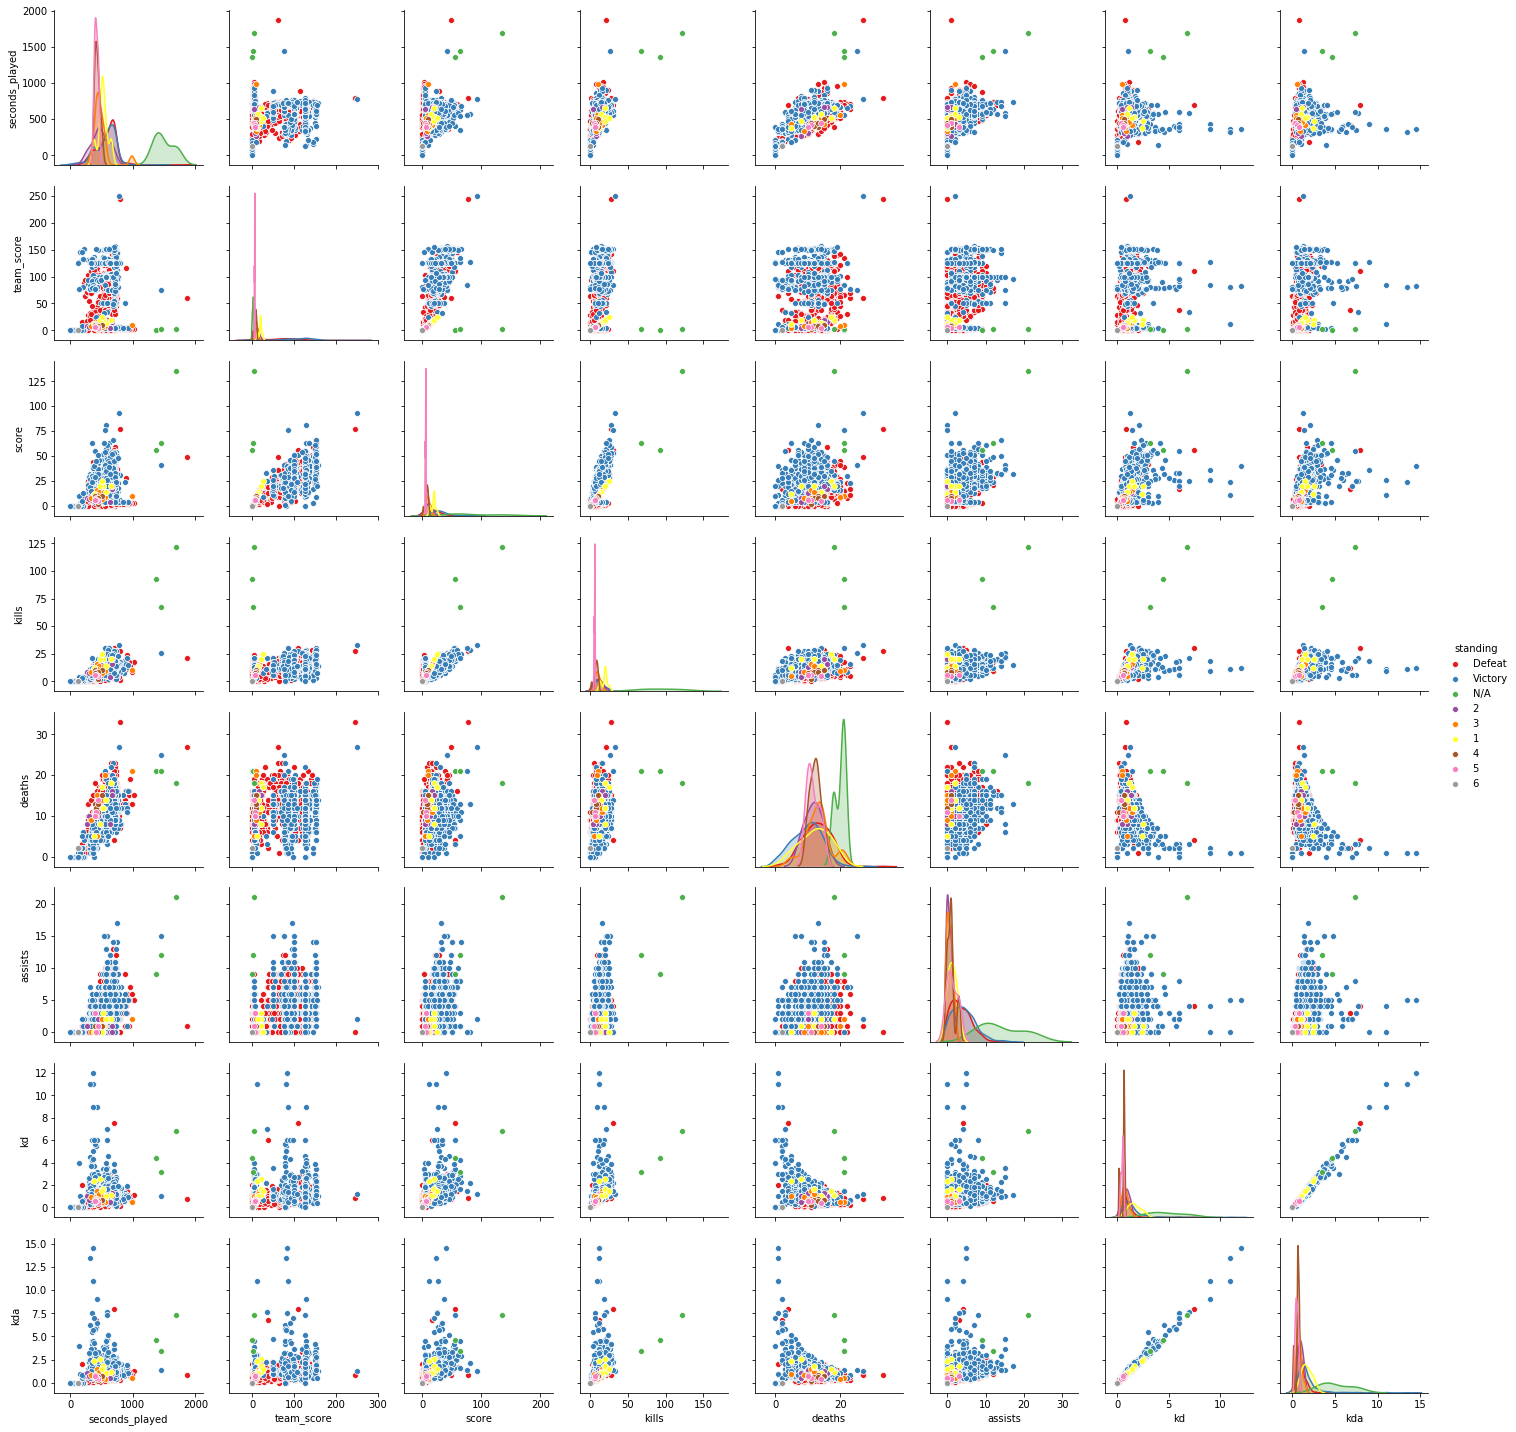

In [112]:
sns.pairplot(oblivion1kv, hue='standing', palette='Set1').savefig('pairplot_Oblivion.png');


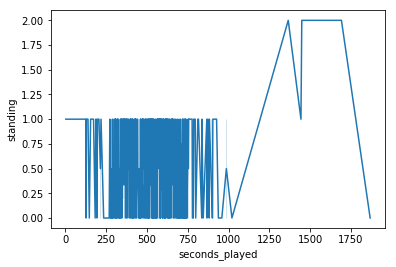

In [118]:
ax = sns.lineplot(x=X1, y=y);
ax.figure.savefig('seconds_oblivion.png')

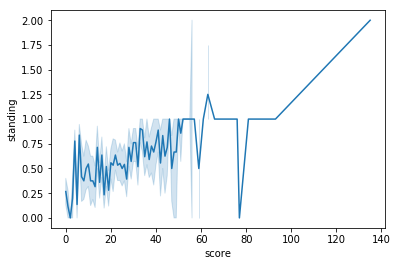

In [119]:
ax = sns.lineplot(x=X2, y=y);
ax.figure.savefig('score_oblivion.png')
# in this plot you can see as score increases so do wins.  values 3-6 are Free for all standings

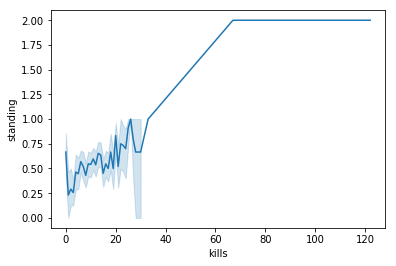

In [106]:
ax = sns.lineplot(x=X3, y=y);
ax.figure.savefig('kills_oblivion.png')
# similar patterns with kills

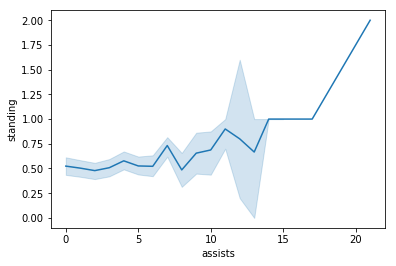

In [120]:
ax = sns.lineplot(x=X4, y=y);
ax.figure.savefig('assists_oblivion.png')
# as expected greater asists lead to more winning

In [121]:
## info for crux/relinqushed
drops(crux14)
enc(crux14, cat_feats)
xy(crux14)

(     seconds_played                    mode                map special_event  \
 0               396                 Control            Equinox   Iron Banner   
 1               640                 Control           Pacifica   Iron Banner   
 2               734                 Control        The Citadel   Iron Banner   
 3               424                 Control            Equinox   Iron Banner   
 4               438                 Control            Midtown   Iron Banner   
 5               548                 Control           Solitude   Iron Banner   
 6               946                Survival     Altar of Flame   Competitive   
 7               712                   Clash      Distant Shore   Competitive   
 8               713                 Control        The Citadel   Iron Banner   
 9               635      Control: Quickplay     Altar of Flame     Quickplay   
 10              625    Control: Competitive           Meltdown   Competitive   
 11              528    Cont

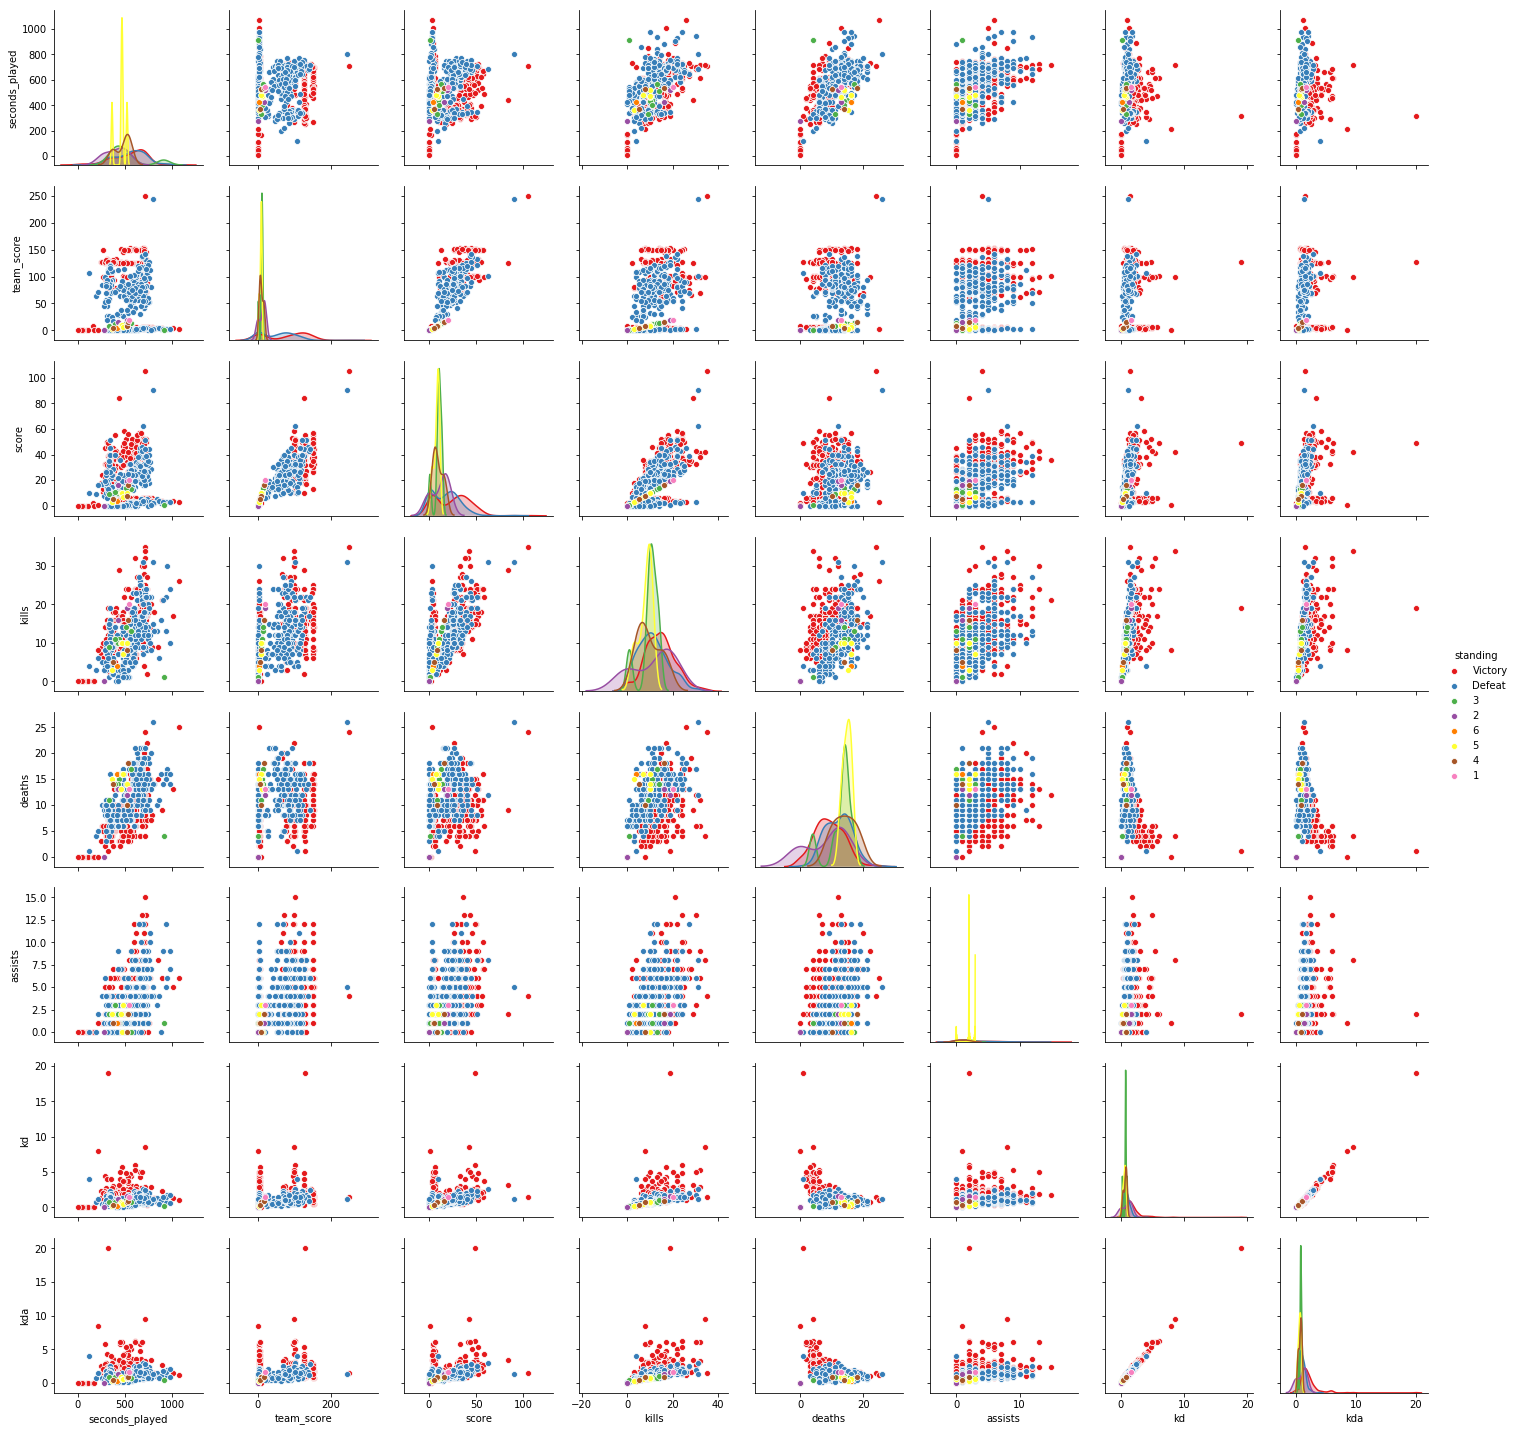

In [122]:
sns.pairplot(crux14, hue='standing', palette='Set1').savefig('pairplot_Sable.png');


In [127]:
drops(relinqushed137)
enc(relinqushed137, cat_feats)
xy(relinqushed137)

(      seconds_played                  mode              map special_event  \
 0                649    Control: Quickplay         Pacifica     Quickplay   
 1                575             Supremacy   Altar of Flame                 
 2                714      Clash: Quickplay   Altar of Flame     Quickplay   
 3                600    Control: Quickplay     Endless Vale     Quickplay   
 4                687    Control: Quickplay  The Dead Cliffs     Quickplay   
 5                707      Clash: Quickplay      Retribution     Quickplay   
 6                496             Supremacy      The Burnout                 
 7                334             Supremacy   Gambler's Ruin                 
 8                666             Supremacy         Solitude                 
 9                157             Supremacy       Bannerfall                 
 10               608             Supremacy   Legion's Gulch                 
 11               641  Control: Competitive   Legion's Gulch   C

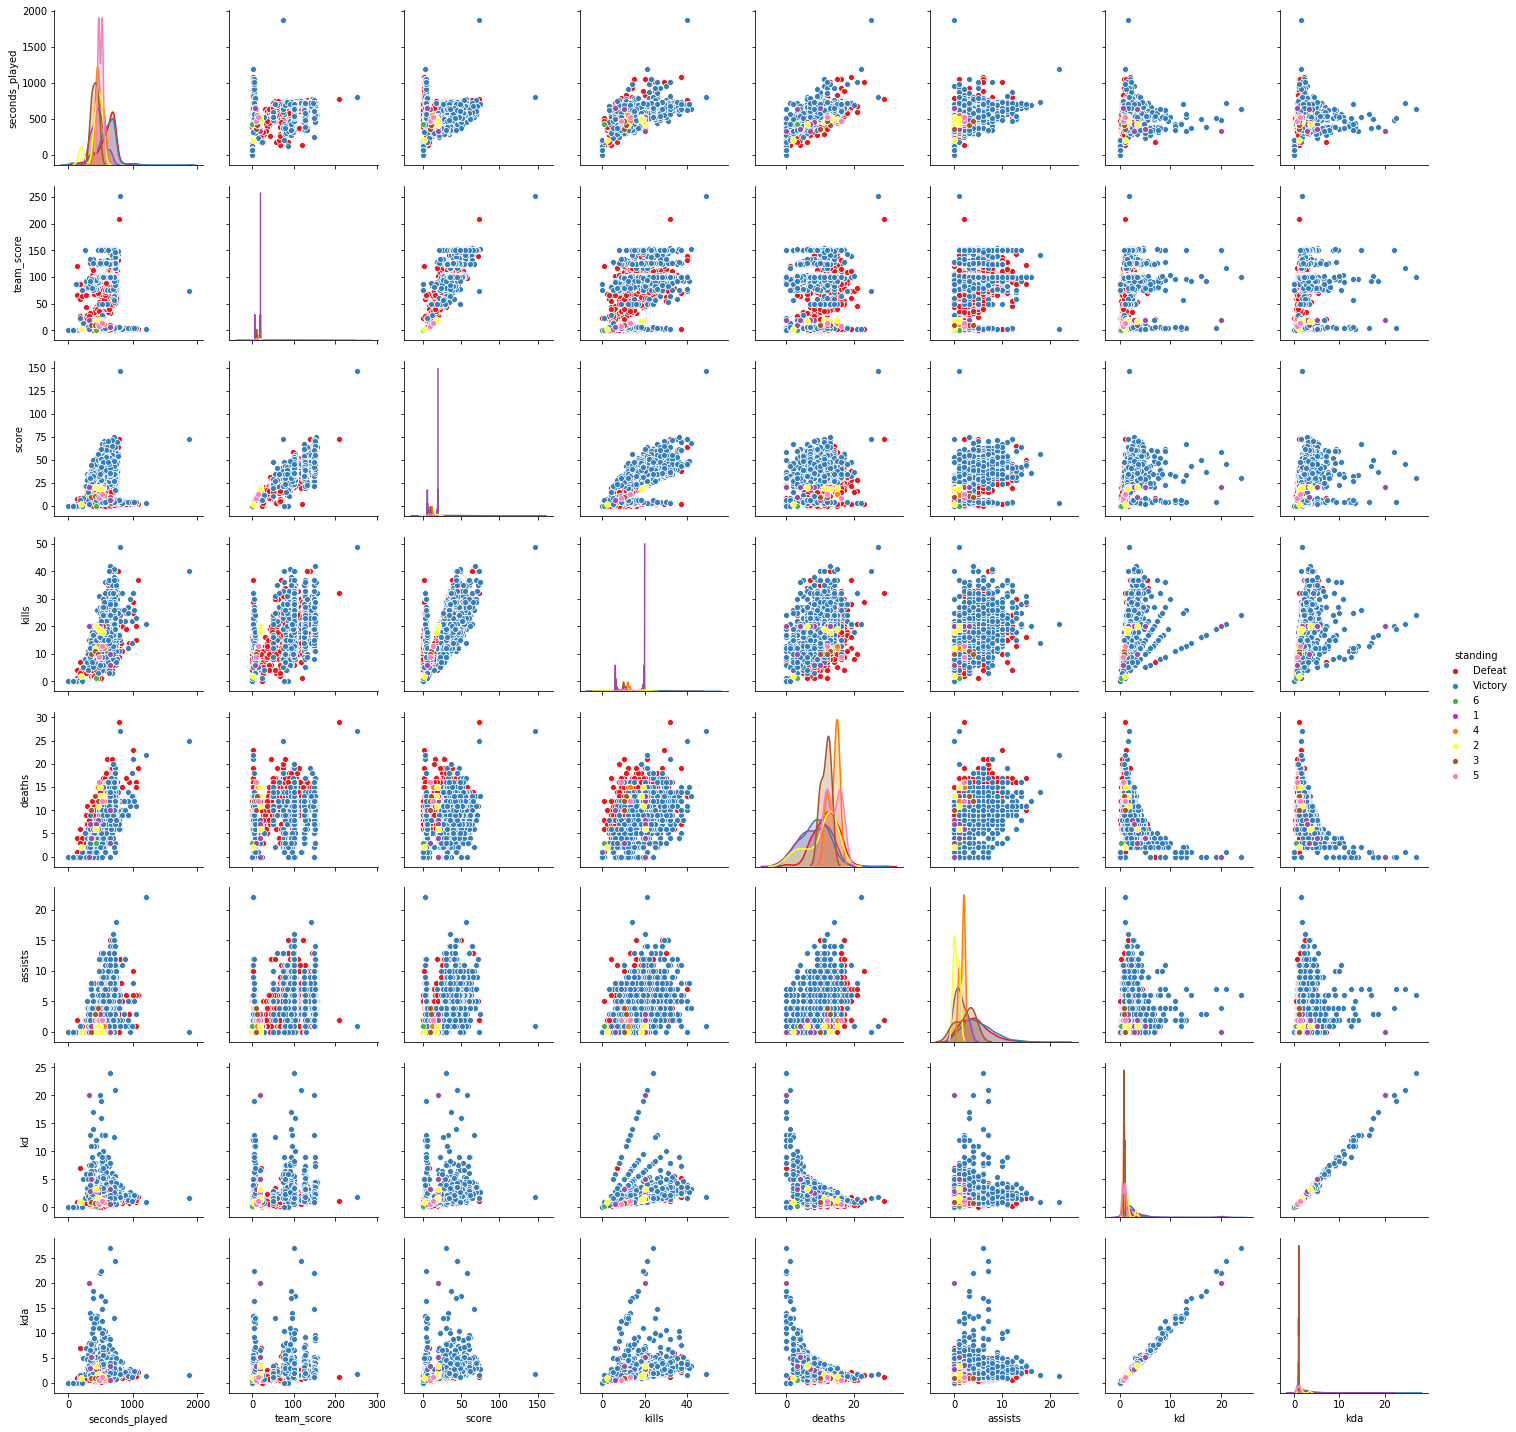

In [128]:
sns.pairplot(relinqushed137, hue='standing', palette='Set1').savefig('pairplot_Geo.png');

In [125]:
drops(littlevixen)
enc(littlevixen, cat_feats)
xy(littlevixen)

(      seconds_played                    mode                map special_event  \
 0                946                Survival     Altar of Flame   Competitive   
 1                710                   Clash      Distant Shore   Competitive   
 2                711                 Control        The Citadel   Iron Banner   
 3                709    Control: Competitive          Wormhaven   Competitive   
 4               1367                  Mayhem      Emerald Coast                 
 5               1453                  Mayhem      Emerald Coast                 
 6                520   Private Matches Clash        Retribution                 
 7                469   Private Matches Clash        Retribution                 
 8                595   Private Matches Clash        Retribution                 
 9                656   Private Matches Clash        Retribution                 
 10               516   Private Matches Clash        Retribution                 
 11             

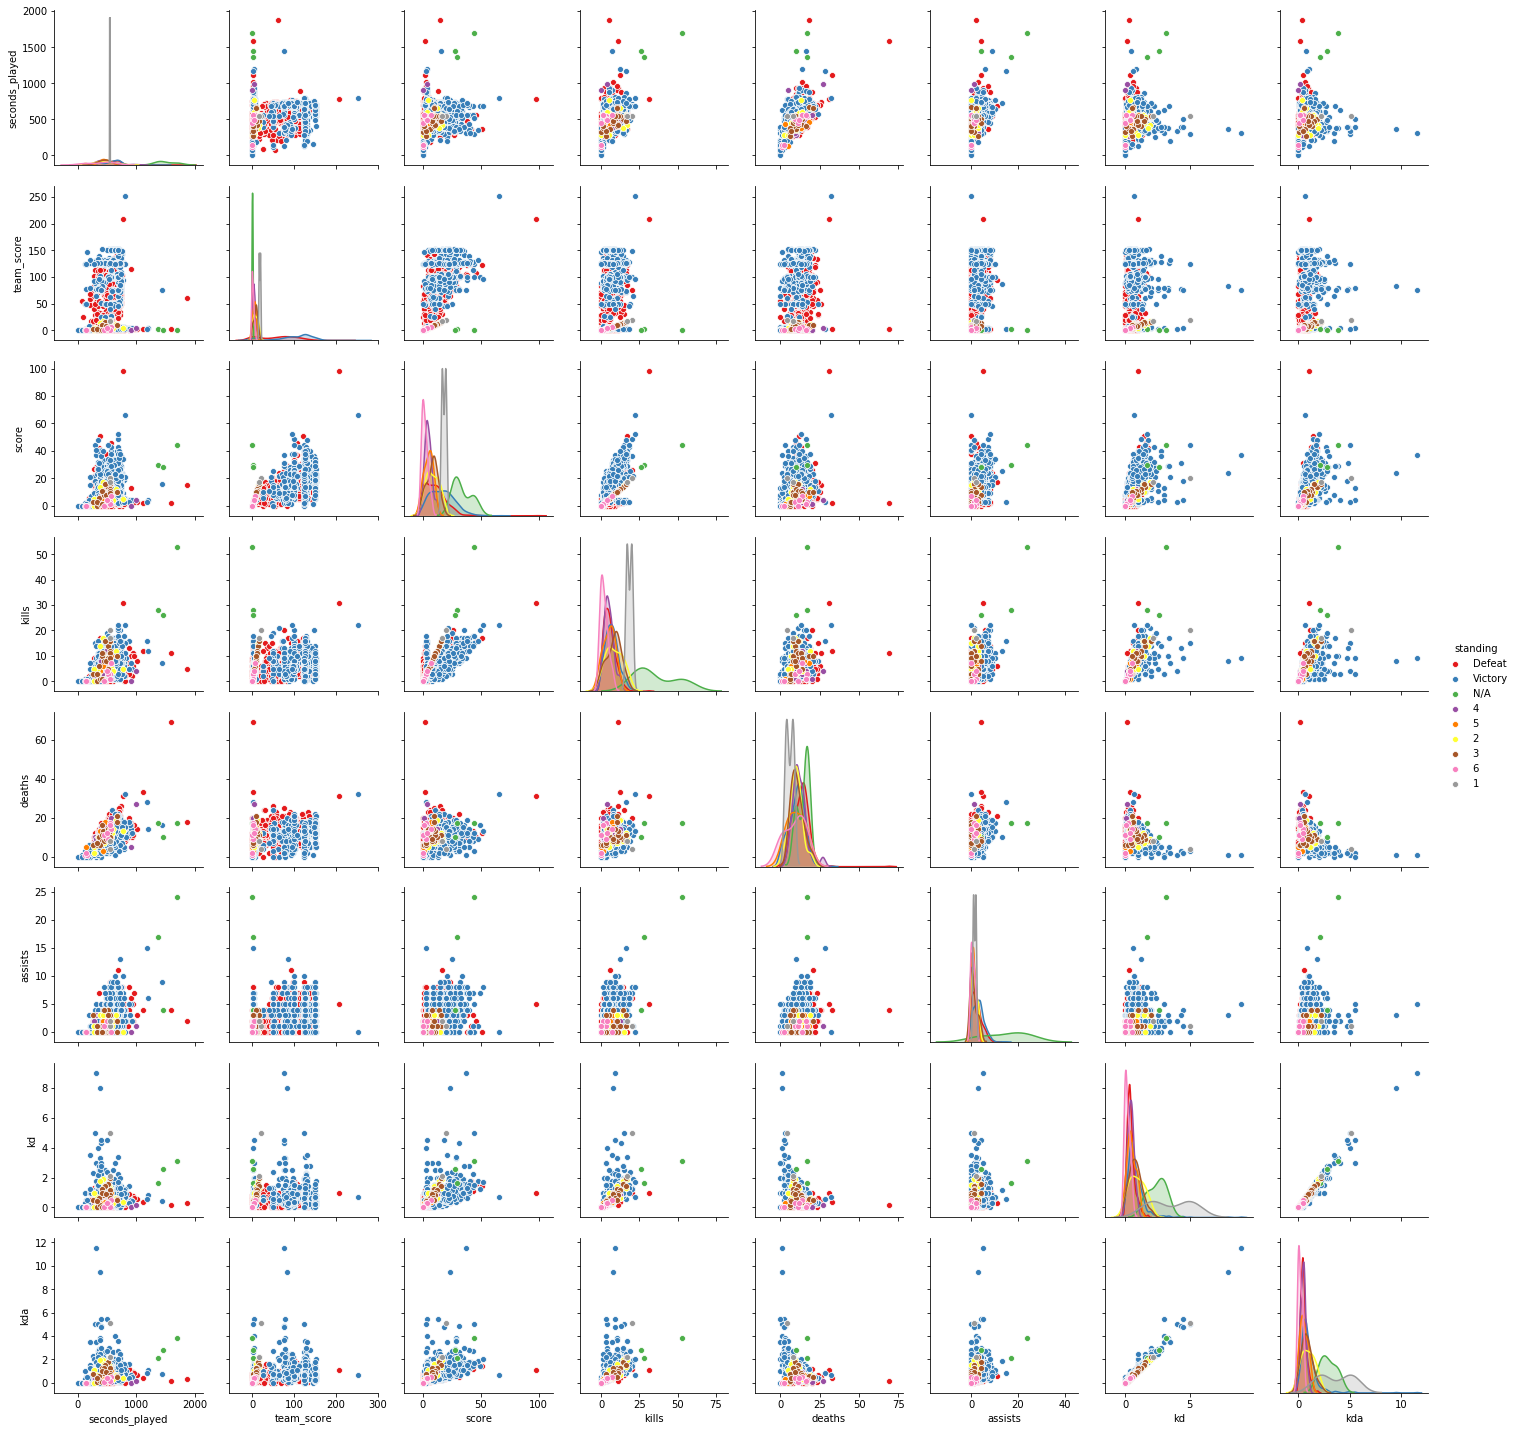

In [126]:
sns.pairplot(littlevixen, hue='standing', palette='Set1').savefig('pairplot_vix.png');